# Study on the Al-istihlāl ṭāb`

This notebook provides all the code for the article *A study of the assumptions of the al-istihlāl ṭāb` in arab-andalusian mu-sic* by Rubén Eguinoa and Valentín Malpica, developed in the scope of a project for the Audio and Music Processing Lab course in the Master in Sound and Music Computing, Universitat Pompeu Fabra (2021).

Among our own code, the next codes have been also adapted:

[1] [Musical Biridges' Andalusian-tools](https://github.com/Musical-Bridges/andalusian-tools)

[2] [Arab-Andalusian Corpus Analysis](https://github.com/MTG/andalusian-corpus-notebooks)

---

[music21](http://web.mit.edu/music21/) and the [pycompmusic](https://github.com/MTG/pycompmusic) library is needed to run this notebook

Please, inside your working directory create a folder called *scores*

## Install dependencies

In [3]:
from music21 import *
import os
import matplotlib.pyplot as plt
from compmusic import dunya

## Please set your Dunya token. Go to https://dunya.compmusic.upf.edu/ to create one.
dunya.set_token("5fe092af9e0179f8dece5ac9772c91a7ee494744")

## Download the andalusian scores

All the sores present in the corpus with the Al-istihlāl ṭāb` will be downloaded in the *scores* folder.

In [4]:
path = "scores/"

records = dunya.andalusian.get_recordings()
mbids = []
q = 0

for rec in records:
    if 'al-istihlāl' in rec['transliterated_title']:
        q += 1
        mbids.append(rec['mbid'])
#         dunya.andalusian.download_score(rec['mbid'], path)
        print(q, 'Downloaded for mbid', rec['mbid'])

print(q)

1 Downloaded for mbid b3d92934-0946-4f2d-8183-312450d7e45e
2 Downloaded for mbid 9727ddbe-eb79-461b-9861-8a60336b17f6
3 Downloaded for mbid 33423585-e406-40ec-ba28-88b0768cb668
4 Downloaded for mbid e3003cd0-430a-4481-a33d-c15c22da2404
5 Downloaded for mbid e22549ae-4a0c-43ef-87f4-e0f81ed49d58
6 Downloaded for mbid a1eac726-208e-4c24-bd57-e34e9e93dcd3
7 Downloaded for mbid 4342021d-03a1-4727-8c0f-3c23180ef374
8 Downloaded for mbid 97223154-d5c2-4c37-8e6c-4c998056a674
9 Downloaded for mbid d4cadf34-1074-44ce-9928-f438198d5d6d
10 Downloaded for mbid 2d2683c4-4b3e-4430-a254-c828427bdcc7
11 Downloaded for mbid c20e4852-d140-4909-acab-e850c0e7d8e8
12 Downloaded for mbid 1630e9c2-3c01-4959-a633-7dbacbc7616e
13 Downloaded for mbid 3e5a82a2-d806-45cc-876e-6fa8a2b5a61d
14 Downloaded for mbid cb85269e-ab6c-4226-aea1-8226be1fe86c
15 Downloaded for mbid 023b4a37-1ab4-4593-b03a-850ee0db8350
16 Downloaded for mbid 9b546274-eea6-459f-a0c2-918f0997fa2b
17 Downloaded for mbid 679856bc-132f-4982-b04e-cb

In [5]:
# Finding all the recordings with any al-istihlāl tab, but that they are not in the previous finding
records = dunya.andalusian.get_recordings()
withTab = []

for rec in records:
  info = dunya.andalusian.get_recording(rec['mbid'])
  for section in info['sections']:
    if rec['mbid'] not in mbids:
      if 'al-istihlāl' in section['tab']['transliterated_name']:
        part = {}
        part['tab']  = section['tab']['transliterated_name']
        part['mbid'] = rec['mbid']
        part['uuid'] = section['tab']['uuid']
        part['start_time'] = section['start_time']
        part['end_time'] = section['end_time']
        withTab.append(part)

print(len(withTab))
print(withTab)

6
[{'tab': 'al-istihlāl', 'mbid': '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start_time': '00:00:02', 'end_time': '00:01:22'}, {'tab': 'al-istihlāl', 'mbid': '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start_time': '00:01:22', 'end_time': '00:05:00'}, {'tab': 'al-istihlāl', 'mbid': '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start_time': '00:05:00', 'end_time': '00:09:51'}, {'tab': 'similar to al-istihlāl', 'mbid': '25dde40c-24c8-4411-8e2d-e4c1990917df', 'uuid': '50126cbc-7e6e-483f-ab12-0c125ae956aa', 'start_time': '00:00:02', 'end_time': '00:08:48'}, {'tab': 'similar to al-istihlāl', 'mbid': '25dde40c-24c8-4411-8e2d-e4c1990917df', 'uuid': '50126cbc-7e6e-483f-ab12-0c125ae956aa', 'start_time': '00:08:48', 'end_time': '00:09:43'}, {'tab': 'al-istihlāl', 'mbid': '5eb3c226-d289-40fe-a9f4-697568eb37d5', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start

In [6]:
aux = ''
q = 0
for tabs in withTab:
  print(tabs)
  if aux != tabs['mbid']:
    q += 1
  aux= tabs['mbid']

newMbids = ['91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', '25dde40c-24c8-4411-8e2d-e4c1990917df', '5eb3c226-d289-40fe-a9f4-697568eb37d5']
q = 0
for mbid in newMbids:
  q += 1
#   dunya.andalusian.download_score(mbid, path)
  mbids.append(mbid)
  print(q, 'Downloaded for mbid', mbid)

{'tab': 'al-istihlāl', 'mbid': '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start_time': '00:00:02', 'end_time': '00:01:22'}
{'tab': 'al-istihlāl', 'mbid': '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start_time': '00:01:22', 'end_time': '00:05:00'}
{'tab': 'al-istihlāl', 'mbid': '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start_time': '00:05:00', 'end_time': '00:09:51'}
{'tab': 'similar to al-istihlāl', 'mbid': '25dde40c-24c8-4411-8e2d-e4c1990917df', 'uuid': '50126cbc-7e6e-483f-ab12-0c125ae956aa', 'start_time': '00:00:02', 'end_time': '00:08:48'}
{'tab': 'similar to al-istihlāl', 'mbid': '25dde40c-24c8-4411-8e2d-e4c1990917df', 'uuid': '50126cbc-7e6e-483f-ab12-0c125ae956aa', 'start_time': '00:08:48', 'end_time': '00:09:43'}
{'tab': 'al-istihlāl', 'mbid': '5eb3c226-d289-40fe-a9f4-697568eb37d5', 'uuid': '7357bdcb-ef53-4895-9f74-8b07f8902265', 'start_time': 

## Getting the first note of its part

All the first and last notes from each part of each score are saved.

In [7]:
notesInParts = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'B-': 0}
beggining = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'B-': 0}
ending = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'B-': 0}

totalParts = 0
badMbids = ['2d2683c4-4b3e-4430-a254-c828427bdcc7', 'c20e4852-d140-4909-acab-e850c0e7d8e8', '91d6a3f1-07c3-49b2-bcea-7d6c378e73cd']

for mbid in mbids:
    if mbid not in badMbids:
        s = converter.parse('scores/'+mbid+'.xml')  
        scoreParts = s.parts.stream()
        part = scoreParts[0]
        measures = part.getElementsByClass('Measure').stream()

        tSs = part.flat.getElementsByClass('TimeSignature').stream()
       
        for tS in tSs:
            m = measures[tS.measureNumber-1]
            if m.getElementsByClass(note.Note).stream()[0].isNote:
                totalParts += 1
                n = m.getElementsByClass(note.Note).stream()[0]
                notesInParts[n.pitch.name] += 1
                beggining[n.pitch.name] += 1
            if tS.measureNumber > 1:
                mPrev = measures[tS.measureNumber-2]
                prevNotes = mPrev.getElementsByClass(note.Note).stream()
                if len(prevNotes) >= 1:
                    totalParts += 1
                    notesInParts[prevNotes[len(prevNotes)-1].pitch.name] += 1
                    ending[prevNotes[len(prevNotes)-1].pitch.name] += 1

In [8]:
print('{} parts'.format(totalParts))
print('N\tTOT\tBEG\tEND')
for key in notesInParts.keys():
    print(key, '\t', notesInParts[key], '\t', beggining[key], '\t', ending[key])

246 parts
N	TOT	BEG	END
A 	 9 	 9 	 0
B 	 3 	 0 	 3
C 	 80 	 28 	 52
D 	 23 	 5 	 18
E 	 43 	 39 	 4
F 	 24 	 6 	 18
G 	 63 	 50 	 13
B- 	 1 	 0 	 1


### Drawing the results

Text(0.5, 1.0, 'End')

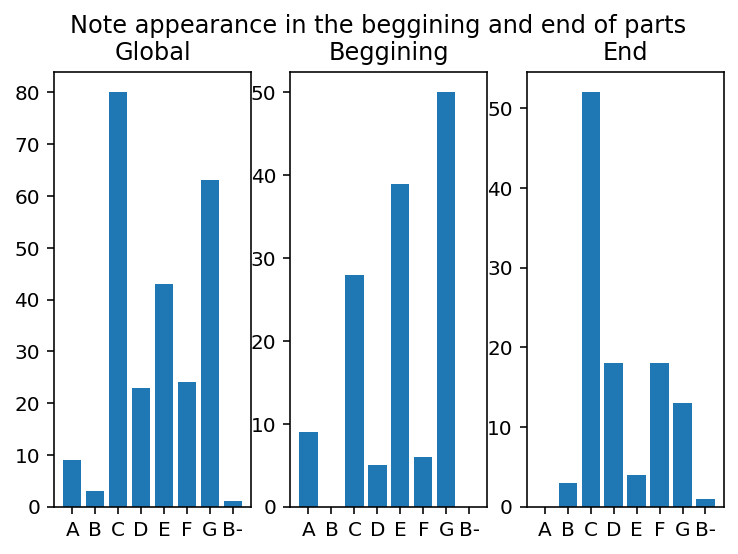

In [11]:
xAll = notesInParts.keys()
yAll = notesInParts.values()

xBeg = beggining.keys()
yBeg = beggining.values()

xEnd = ending.keys()
yEnd = ending.values()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Note appearance in the beggining and end of parts')
ax1.bar(xAll, yAll)
ax1.set_title('Global')
ax2.bar(xBeg, yBeg)
ax2.set_title('Beggining')
ax3.bar(xEnd, yEnd)
ax3.set_title('End')

## Centos

The appearance of each cento is found. Also, the jumps from G or A to a B or B flat is studied.

In [12]:
patterns = [(2, 'A4B-4'),
            (2, 'G4B-4'),
            (2, 'A4B4'),
            (2, 'G4B4'),
            (3, 'G4F4E4'),
            (3, 'E4F4G4'),
            (3, 'F4A4G4'),
            (6, 'G4A4B4C4A4G4'),
            (3, 'A3B3C4'),
            (4, 'F4E4D4C4')]

patternq = {'A4B-4': 0, 'G4B-4': 0, 'A4B4': 0, 'G4B4': 0, 'G4F4E4': 0, 'E4F4G4': 0, 'F4A4G4': 0, 'G4A4B4C4A4G4': 0, 'A3B3C4': 0, 'F4E4D4C4': 0}

colors = ['red', 'blue', 'green', 'fuchsia', 'aqua', 'olive', 'maroon', 'navy', 'teal', 'purple', 'lime', 'yellow']

q = 0

for mbid in mbids:
  filepath = 'scores/'+mbid+'.xml'
  s = converter.parse(filepath)
  p = s.parts[0]
  nr = p.flat.notesAndRests.stream()

  print('\nPatterns found in ', mbid)

  found_patterns = {}
  notes = []
  position = 'above'

  for pattern in patterns:
      pl = pattern[0] # pattern length
      ps = pattern[1] # pattern sequence
      color = colors[patterns.index(pattern)]
      occurrences = 0
      for i in range(len(nr)-pl):
          allNotes = True
          sequence = ''
          for j in range(pl):
              n = nr[i + j]
              if n.isNote:
                  notes.append(n.nameWithOctave)
                  sequence += n.nameWithOctave
              else:
                  allNotes = False
          if allNotes and ps == sequence:
              q += 1
              patternq[ps] += 1
              occurrences += 1
              found_patterns[i] = (pl, position)
              for j in range(pl):
                  n = nr[i + j]
                  n.style.color = color
      if position == 'above':
          position = 'below'
      elif position == 'below':
          position = 'above'
              
      print('  {}: {} ({})'.format(ps, occurrences, color))


Patterns found in  b3d92934-0946-4f2d-8183-312450d7e45e
  A4B-4: 2 (red)
  G4B-4: 3 (blue)
  A4B4: 34 (green)
  G4B4: 0 (fuchsia)
  G4F4E4: 283 (aqua)
  E4F4G4: 158 (olive)
  F4A4G4: 109 (maroon)
  G4A4B4C4A4G4: 0 (navy)
  A3B3C4: 133 (teal)
  F4E4D4C4: 202 (purple)

Patterns found in  9727ddbe-eb79-461b-9861-8a60336b17f6
  A4B-4: 3 (red)
  G4B-4: 0 (blue)
  A4B4: 14 (green)
  G4B4: 0 (fuchsia)
  G4F4E4: 310 (aqua)
  E4F4G4: 119 (olive)
  F4A4G4: 85 (maroon)
  G4A4B4C4A4G4: 0 (navy)
  A3B3C4: 68 (teal)
  F4E4D4C4: 203 (purple)

Patterns found in  33423585-e406-40ec-ba28-88b0768cb668
  A4B-4: 25 (red)
  G4B-4: 0 (blue)
  A4B4: 27 (green)
  G4B4: 5 (fuchsia)
  G4F4E4: 333 (aqua)
  E4F4G4: 249 (olive)
  F4A4G4: 43 (maroon)
  G4A4B4C4A4G4: 0 (navy)
  A3B3C4: 109 (teal)
  F4E4D4C4: 193 (purple)

Patterns found in  e3003cd0-430a-4481-a33d-c15c22da2404
  A4B-4: 25 (red)
  G4B-4: 0 (blue)
  A4B4: 27 (green)
  G4B4: 5 (fuchsia)
  G4F4E4: 333 (aqua)
  E4F4G4: 249 (olive)
  F4A4G4: 43 (maroon)
 

In [13]:
print('Total:', str(q), '\n')
for key, value in patternq.items():
    print(key, ':', value)

Total: 17711 

A4B-4 : 303
G4B-4 : 12
A4B4 : 557
G4B4 : 39
G4F4E4 : 6062
E4F4G4 : 3304
F4A4G4 : 1644
G4A4B4C4A4G4 : 0
A3B3C4 : 1773
F4E4D4C4 : 4017


## Pitch histograms

Histograms of pitches appearing.

c:\users\ruben\appdata\local\programs\python\python39\lib\site-packages\music21\graph\primitives.py:478: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.figure = plt.figure(facecolor=self.colorBackgroundFigure)


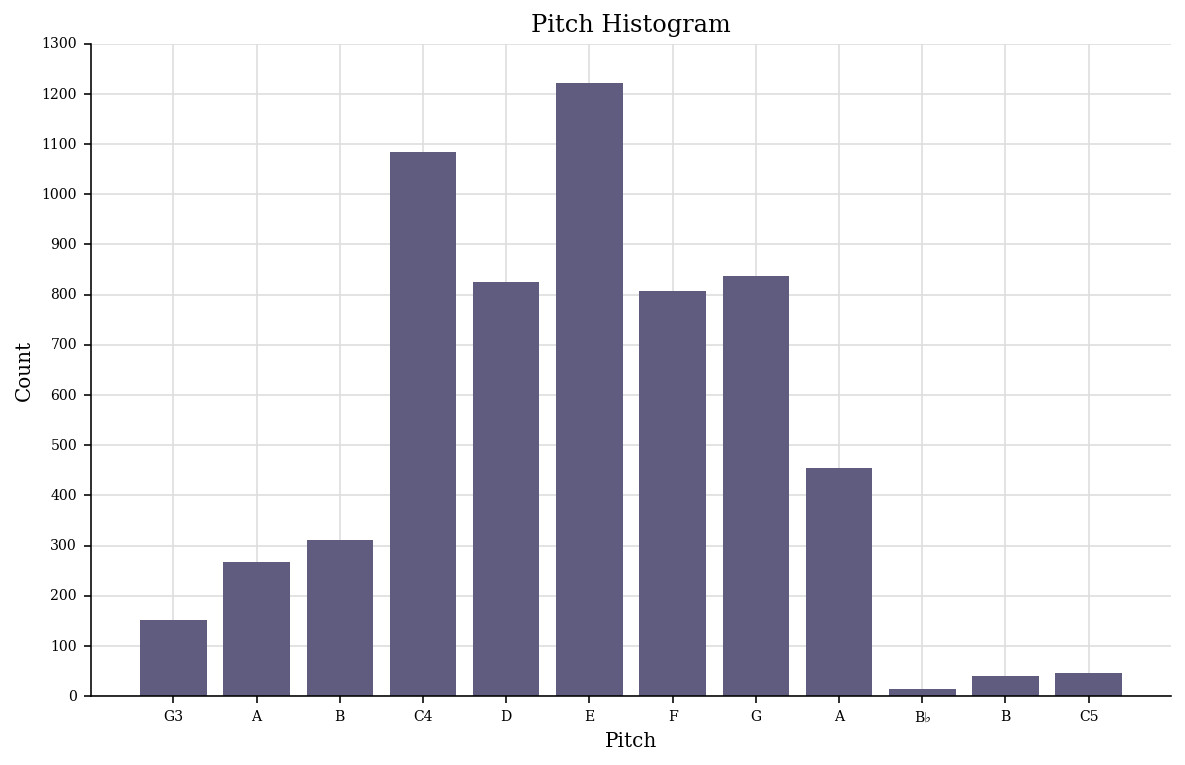

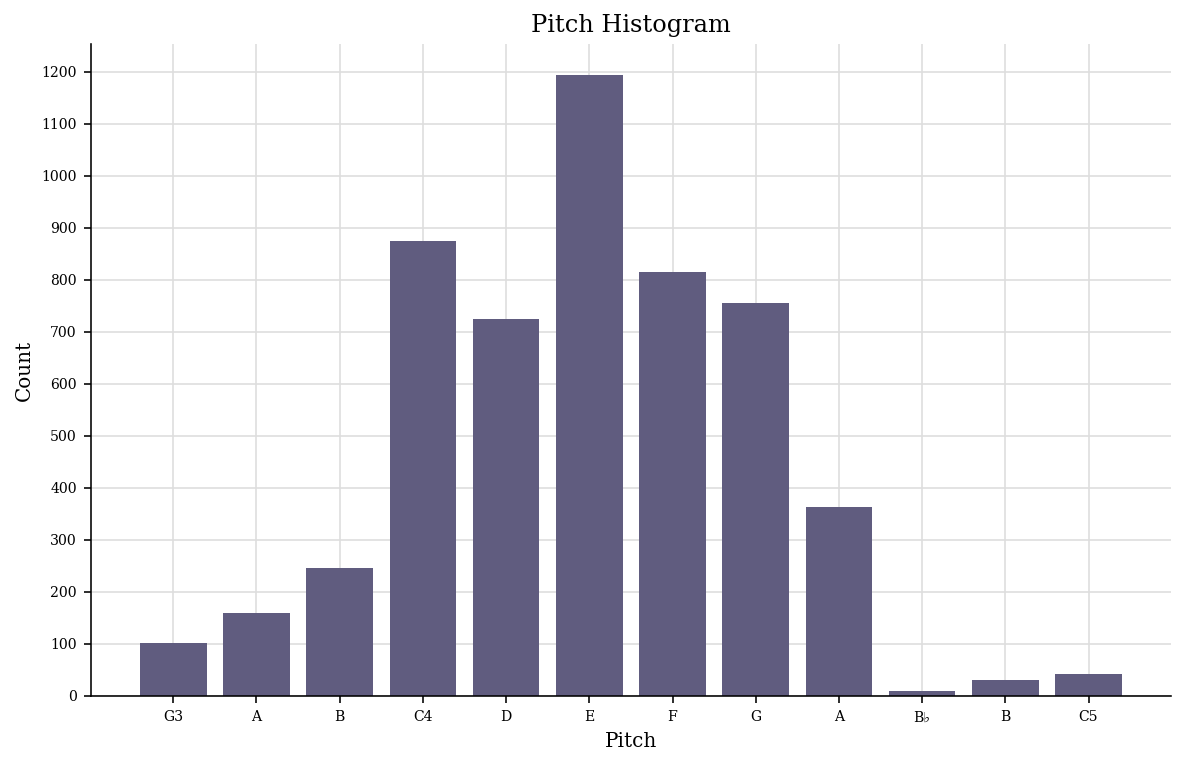

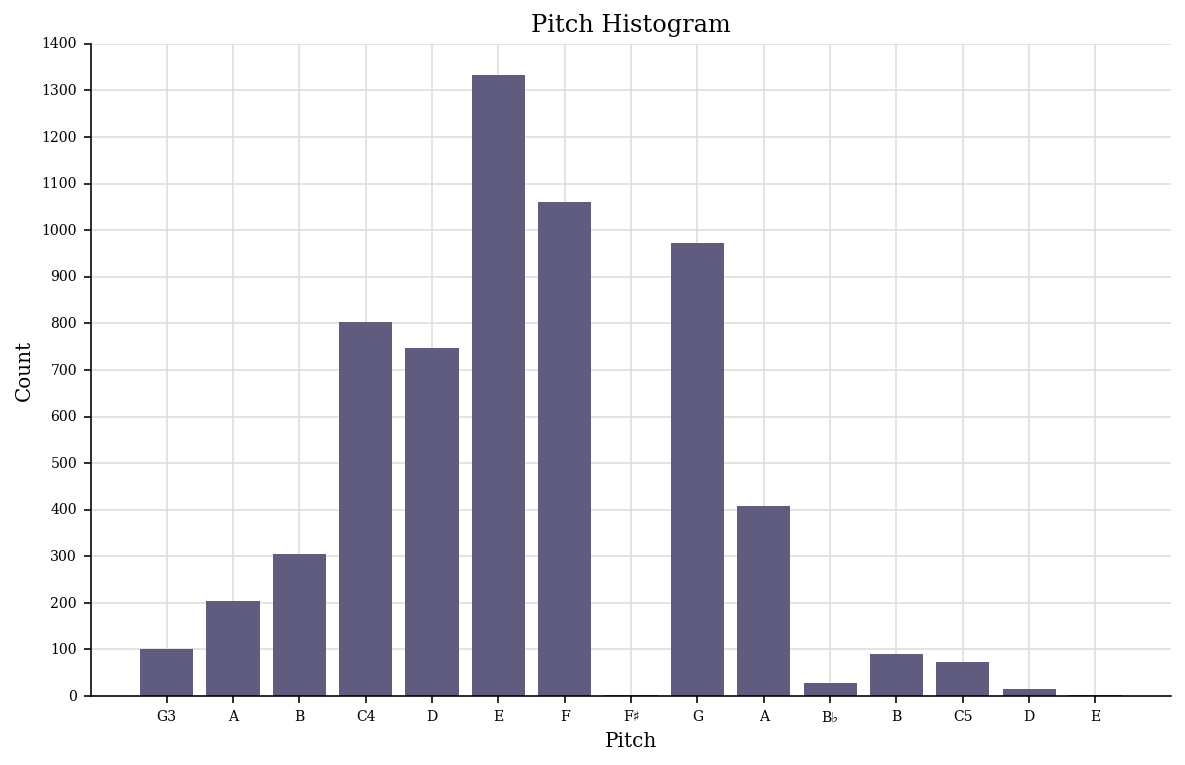

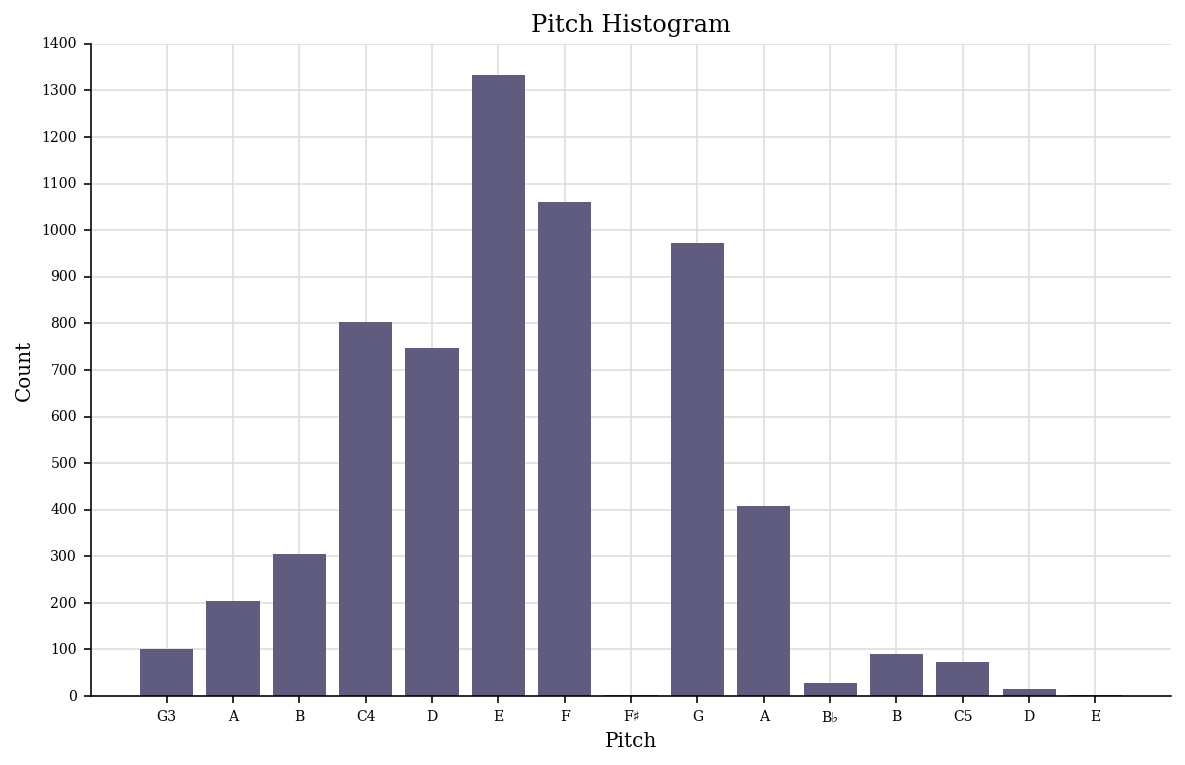

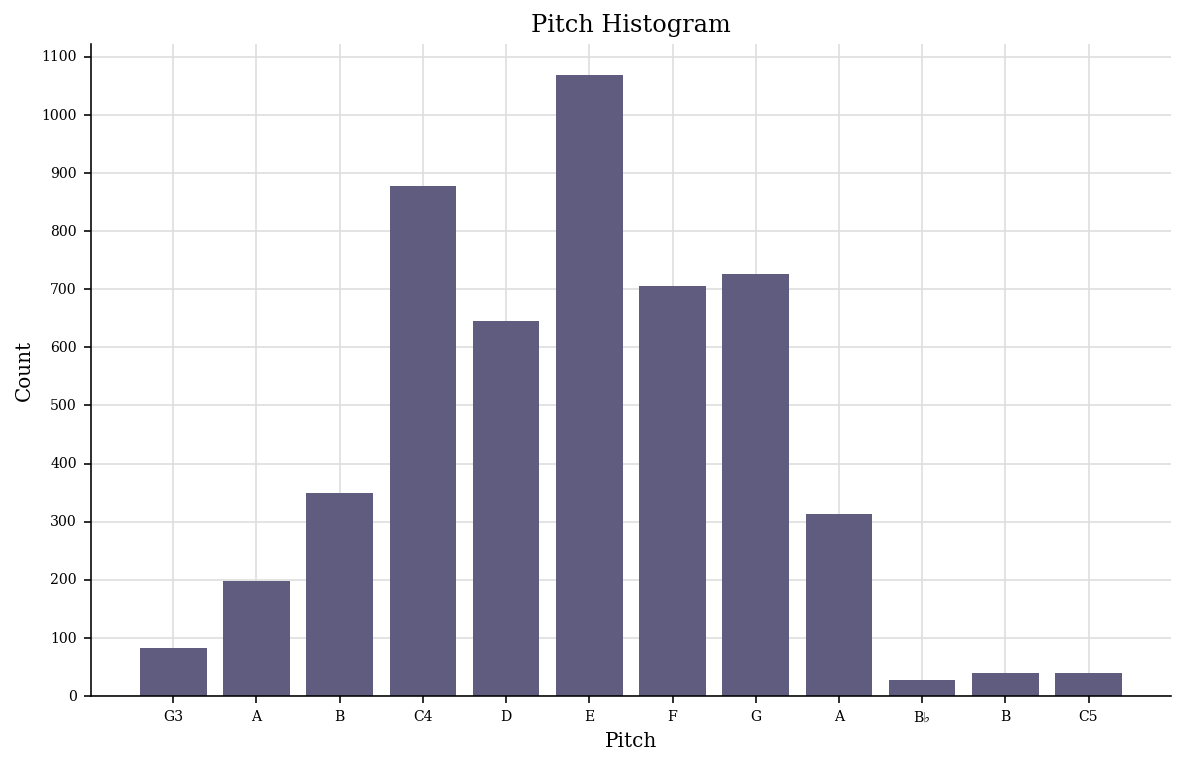

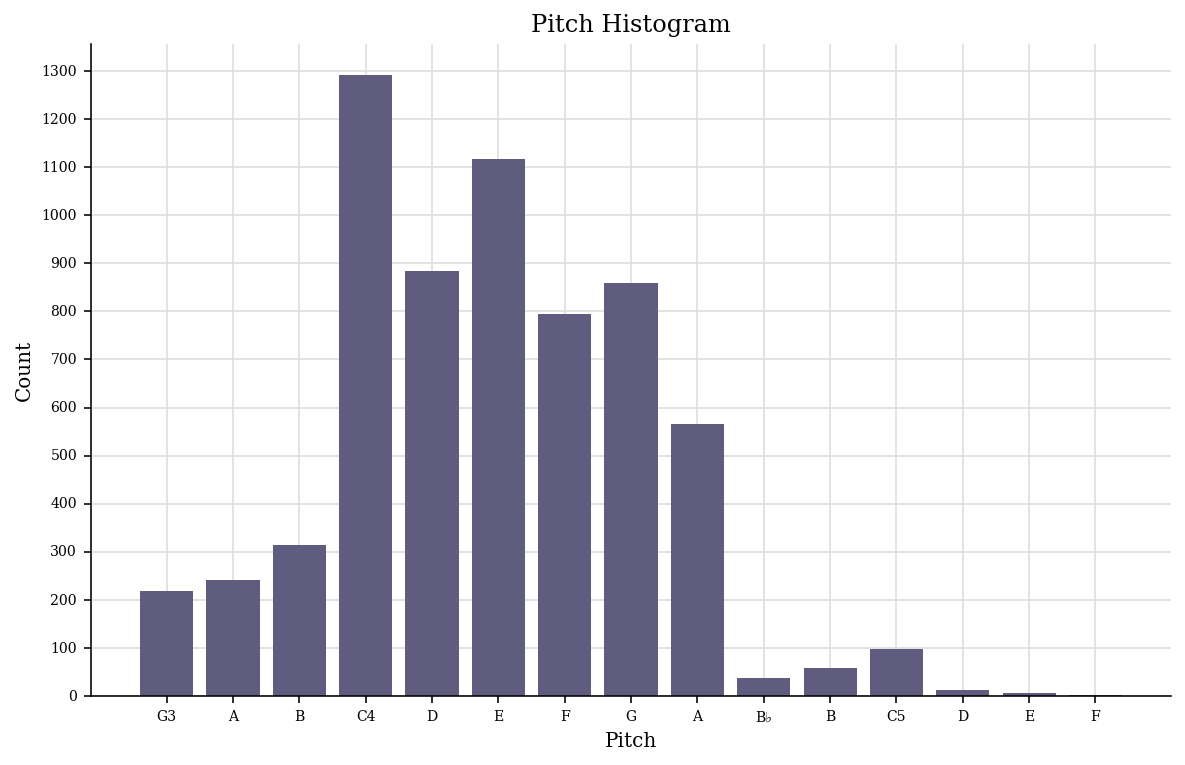

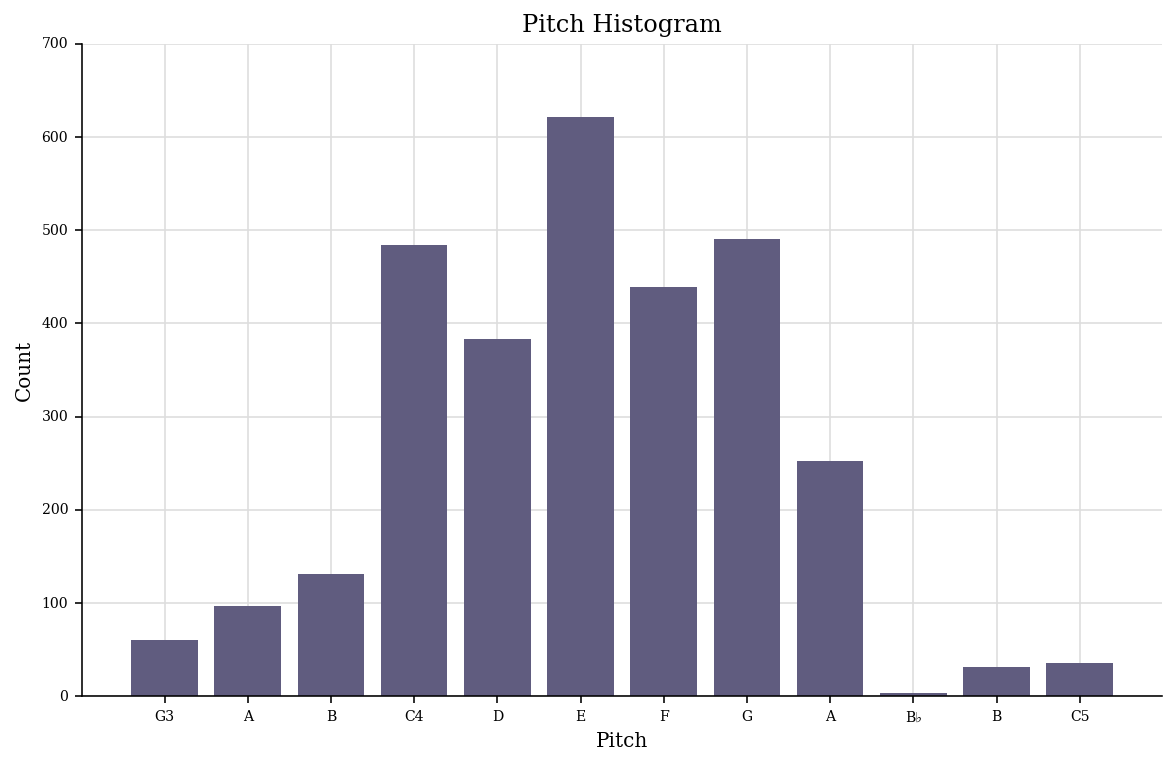

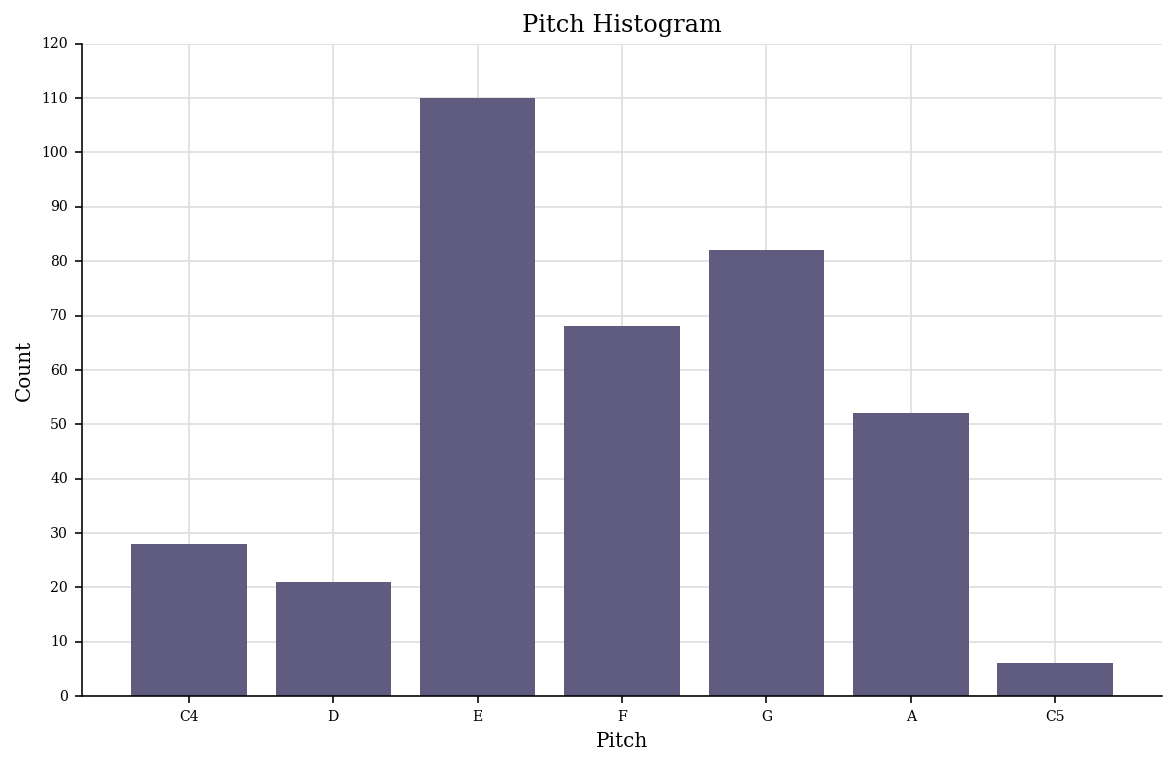

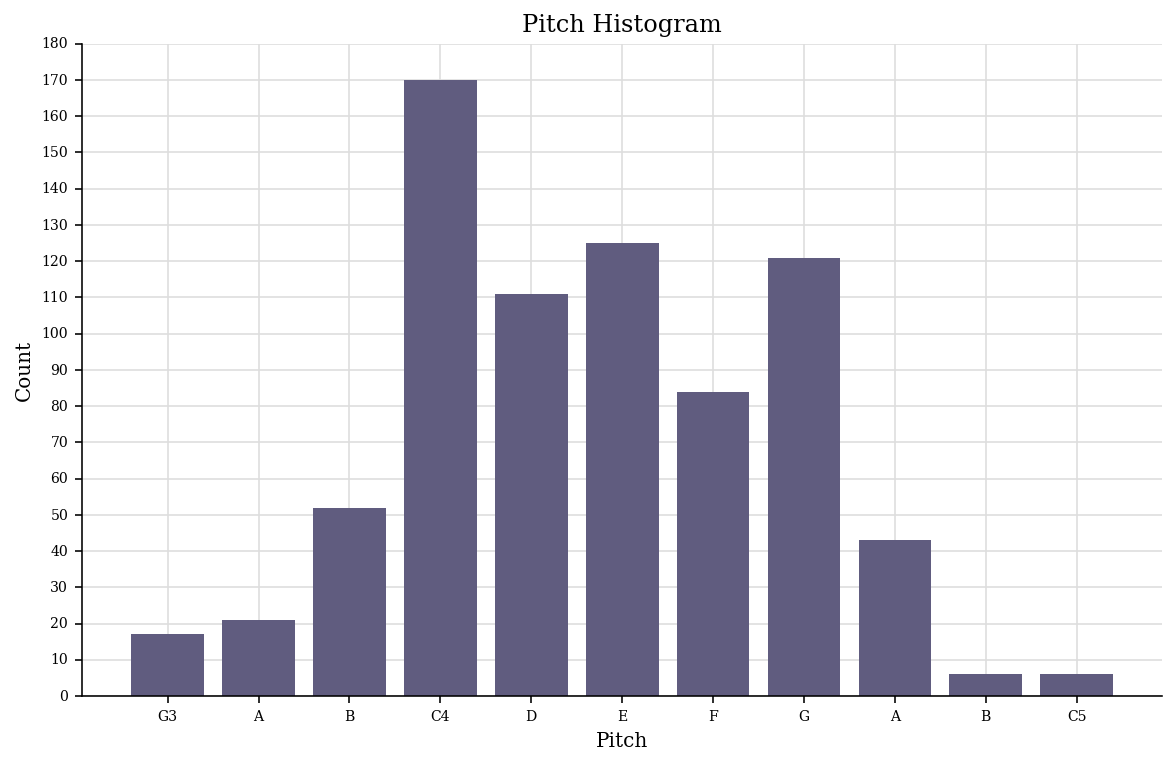

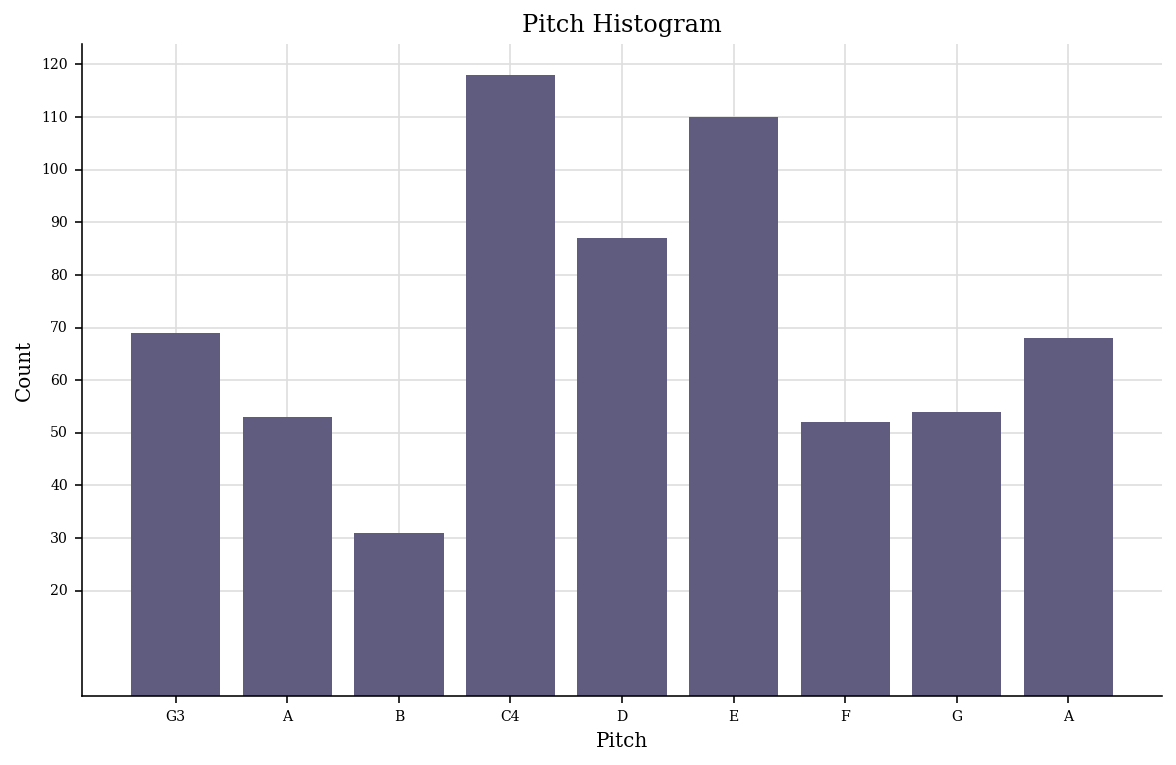

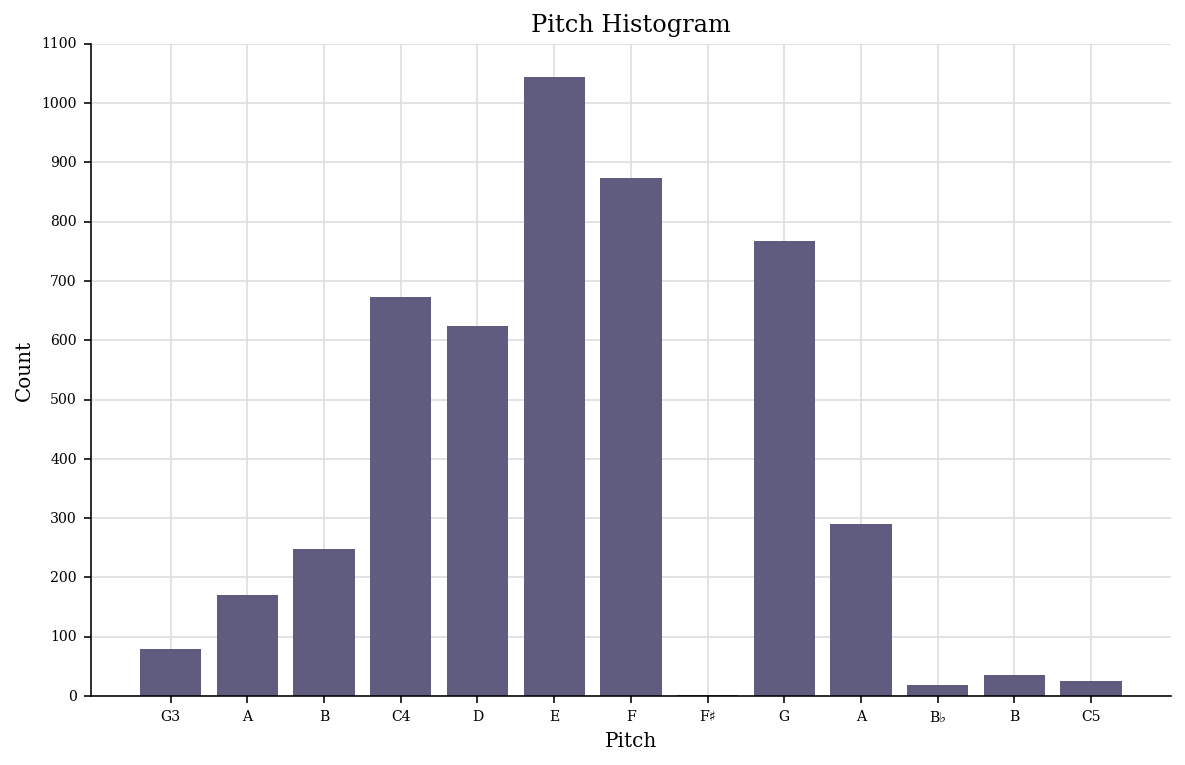

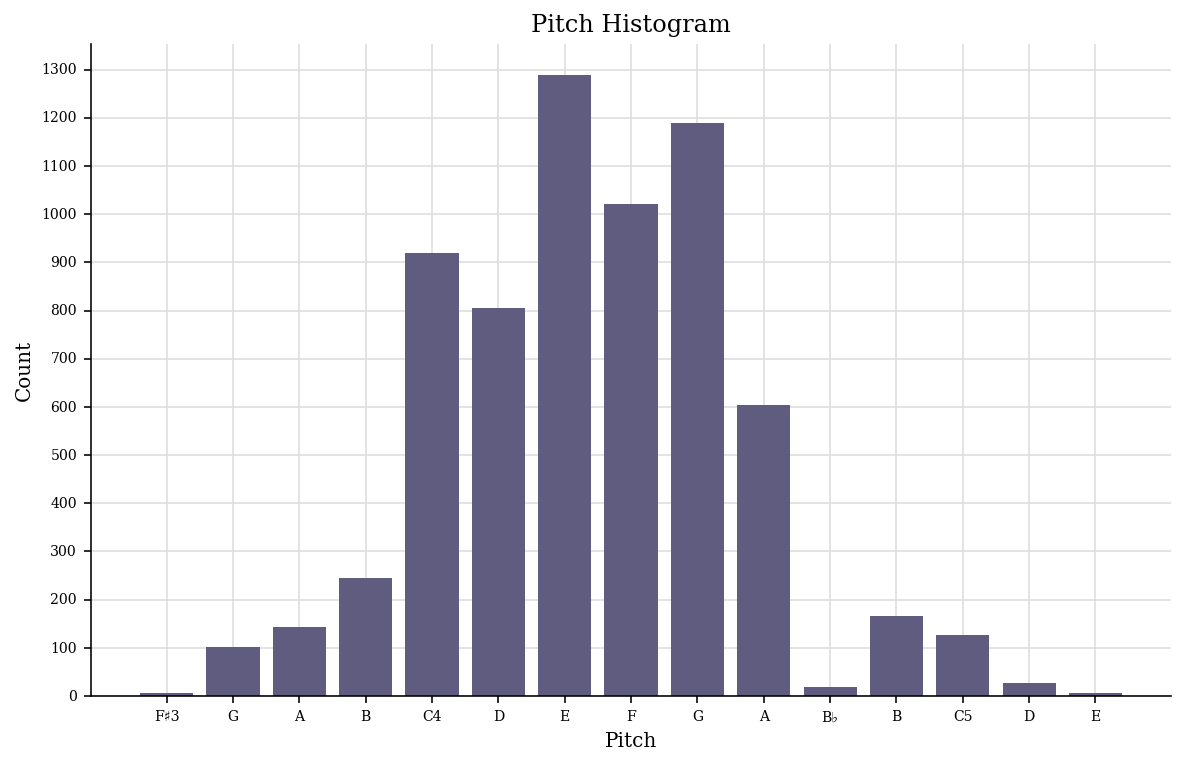

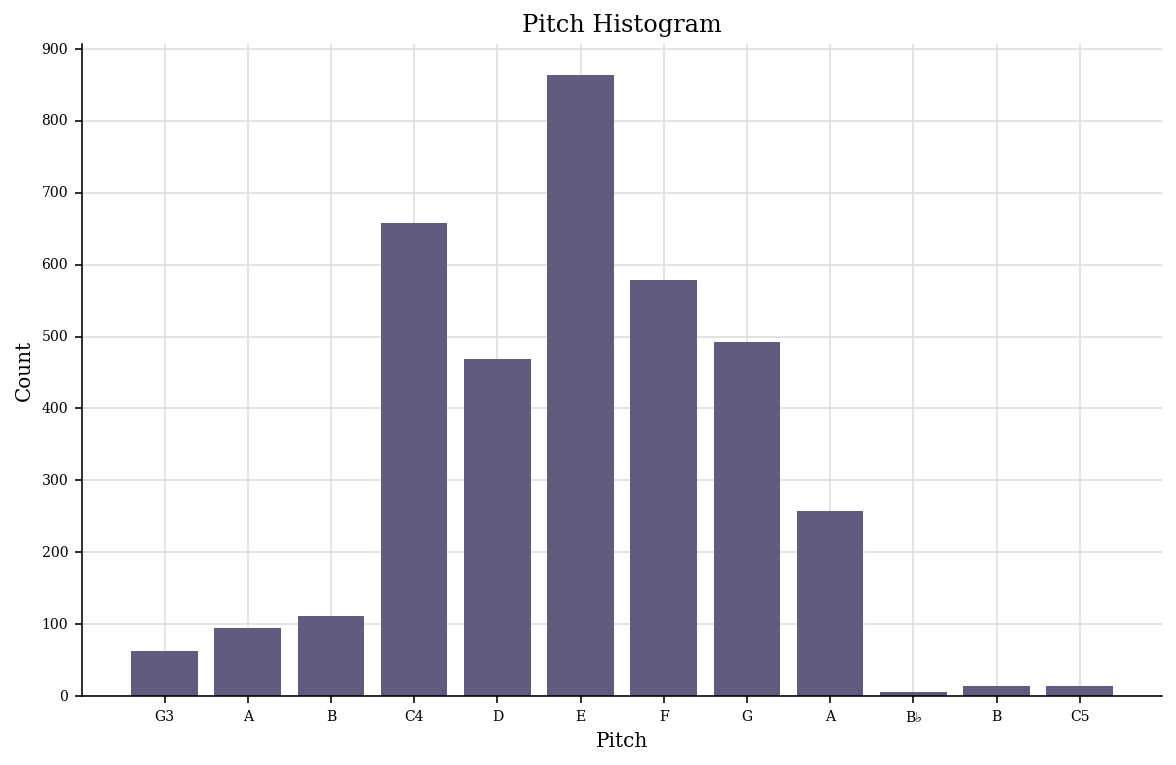

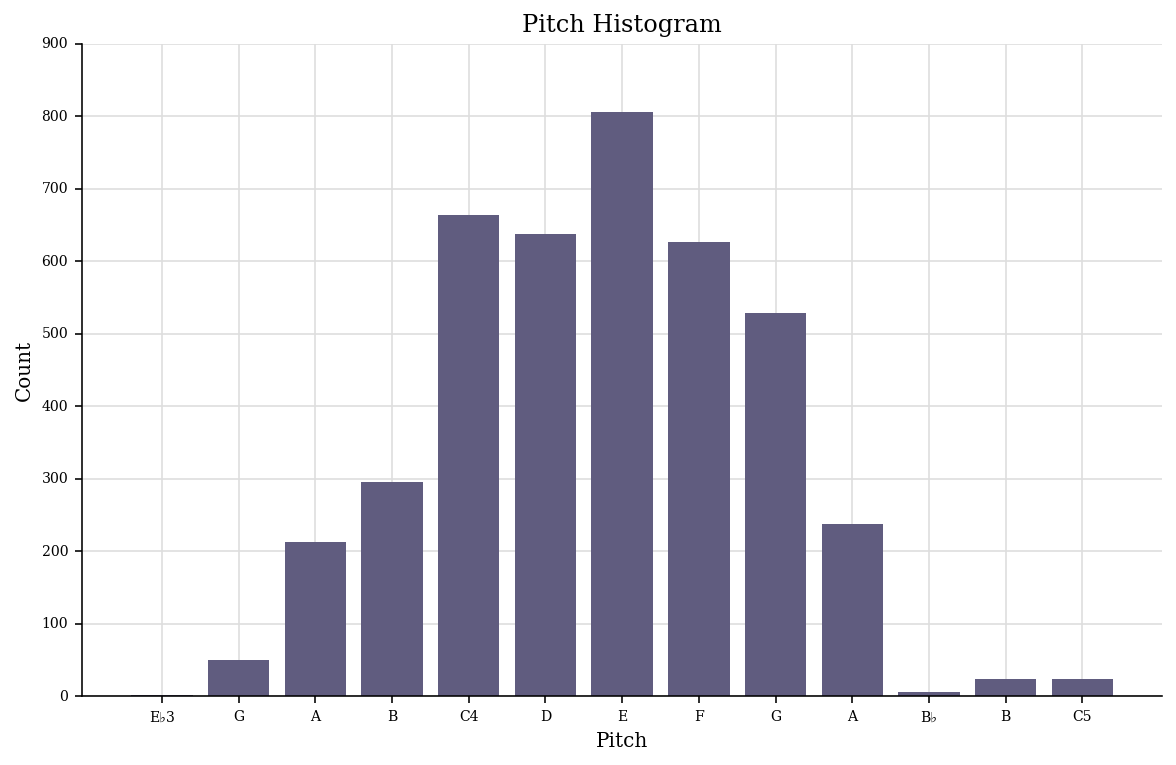

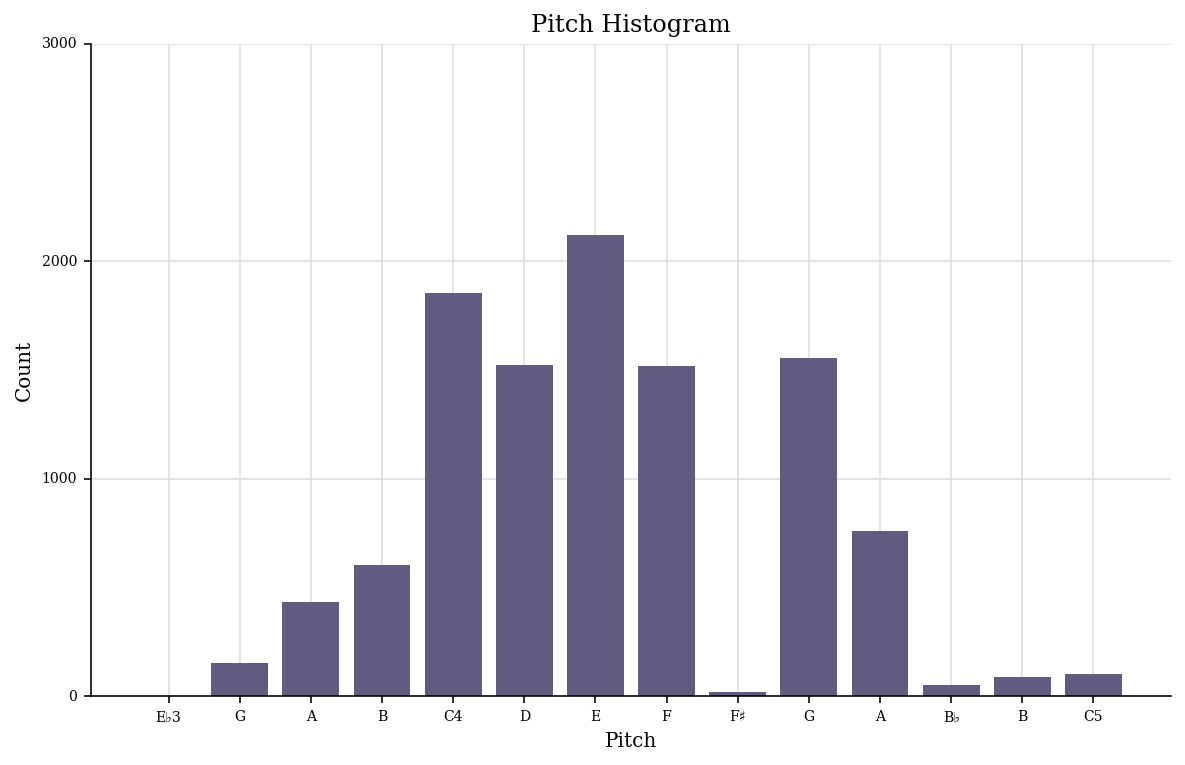

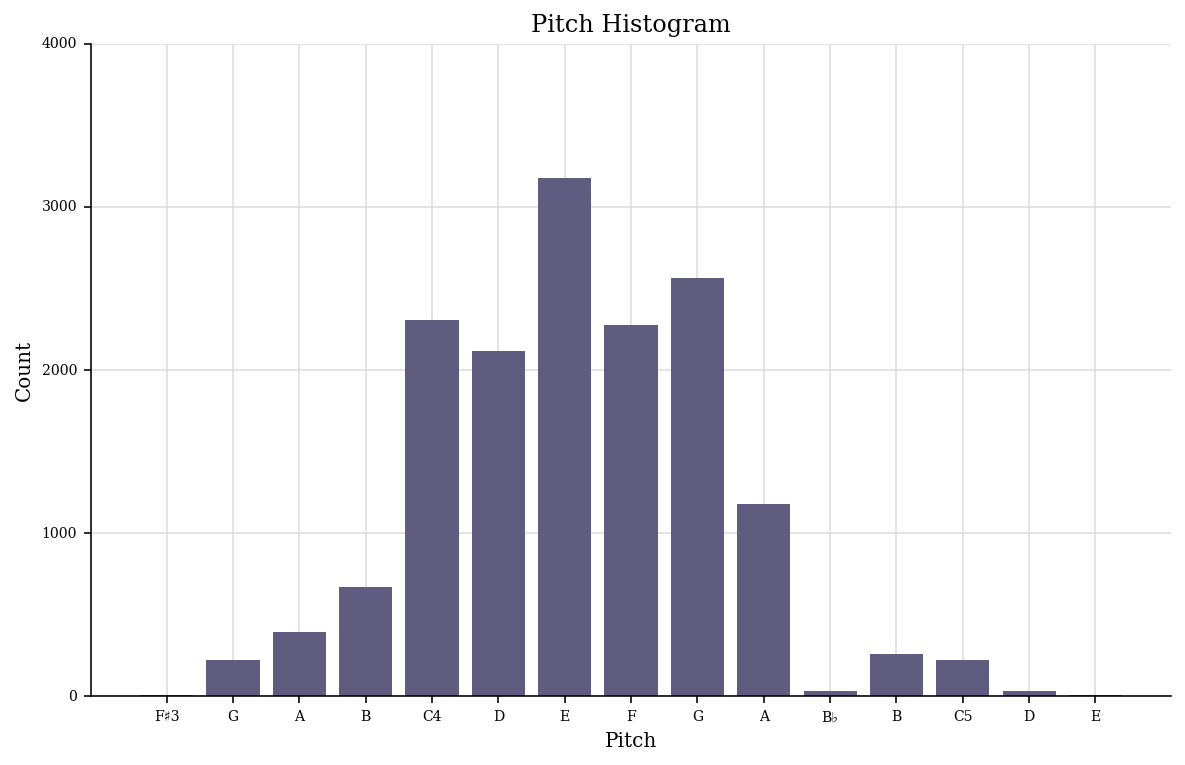

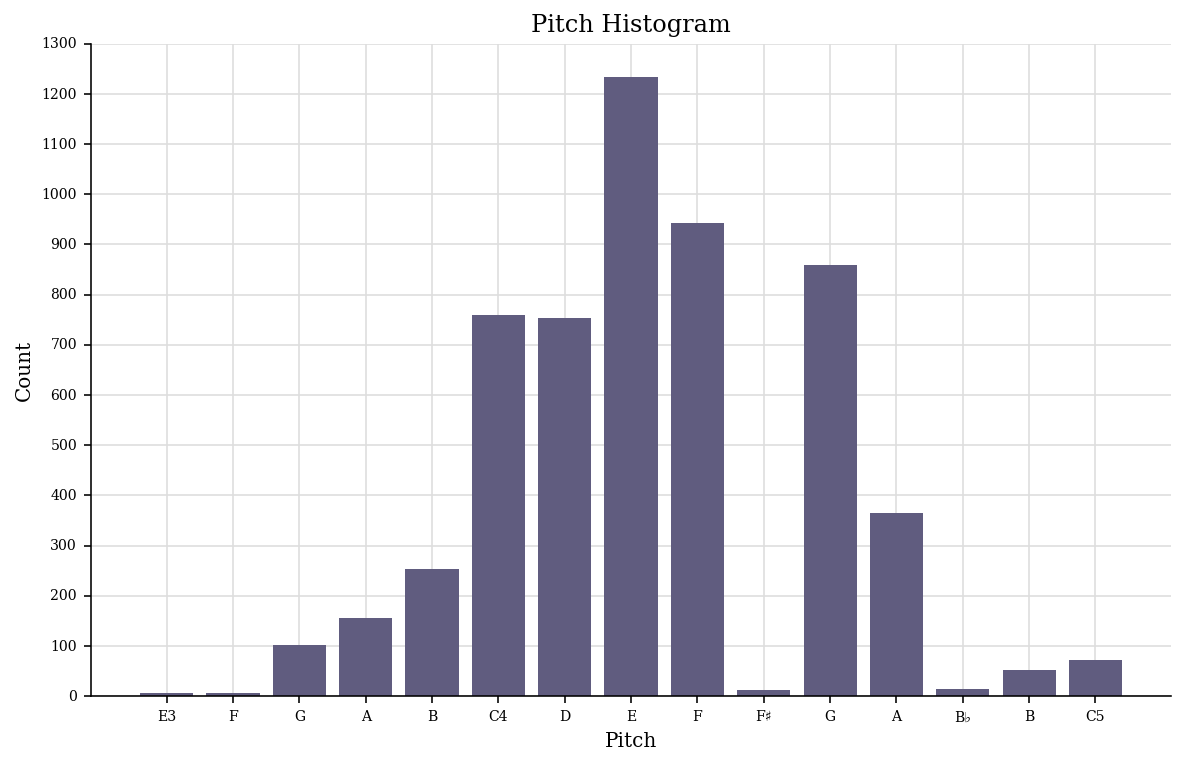

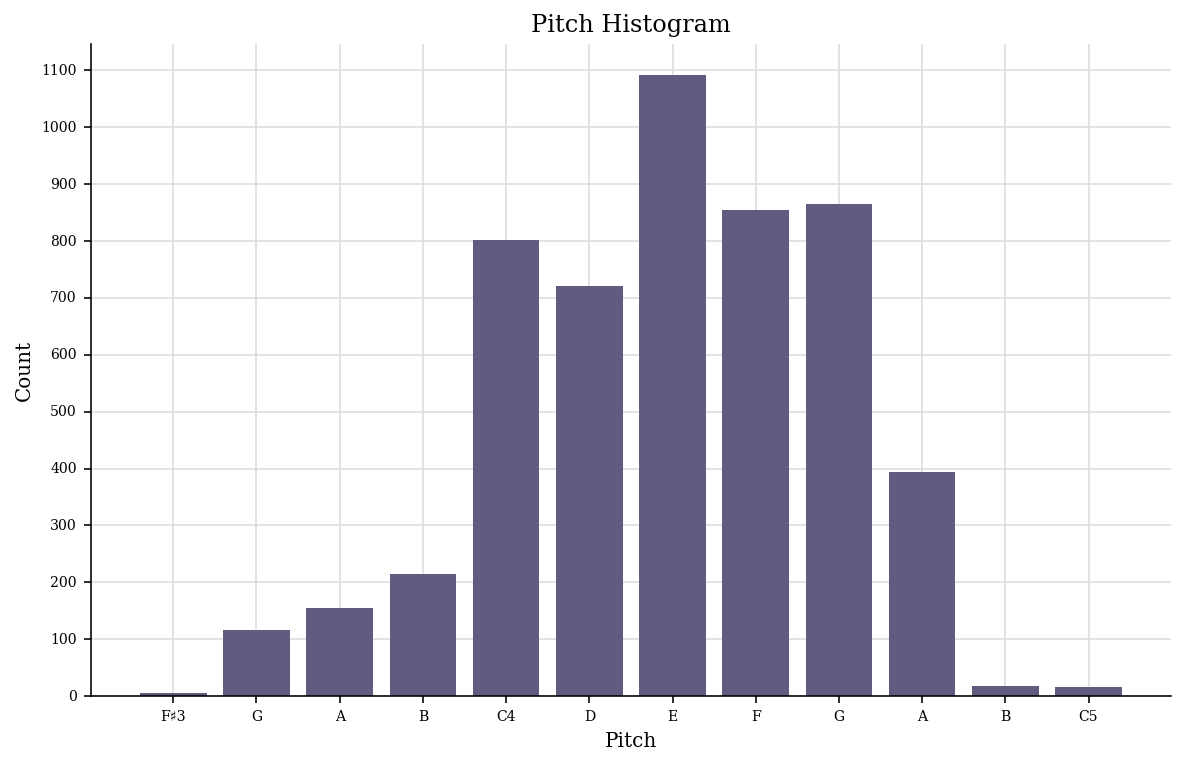

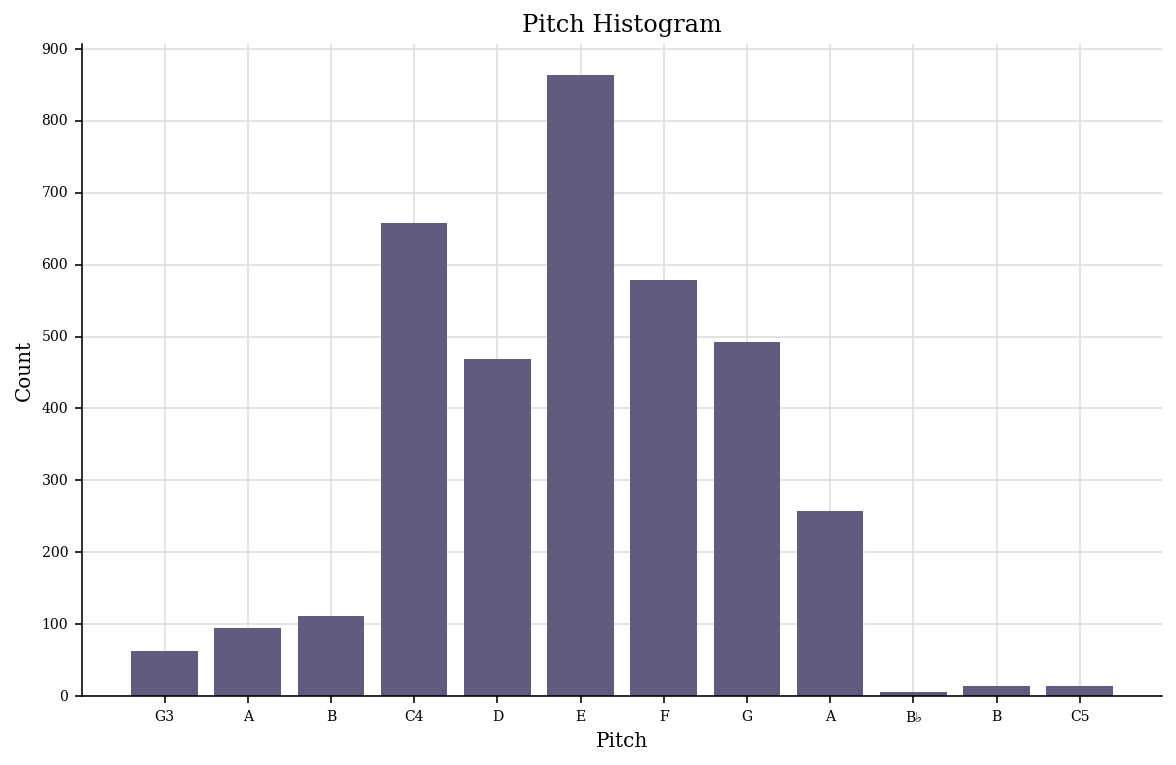

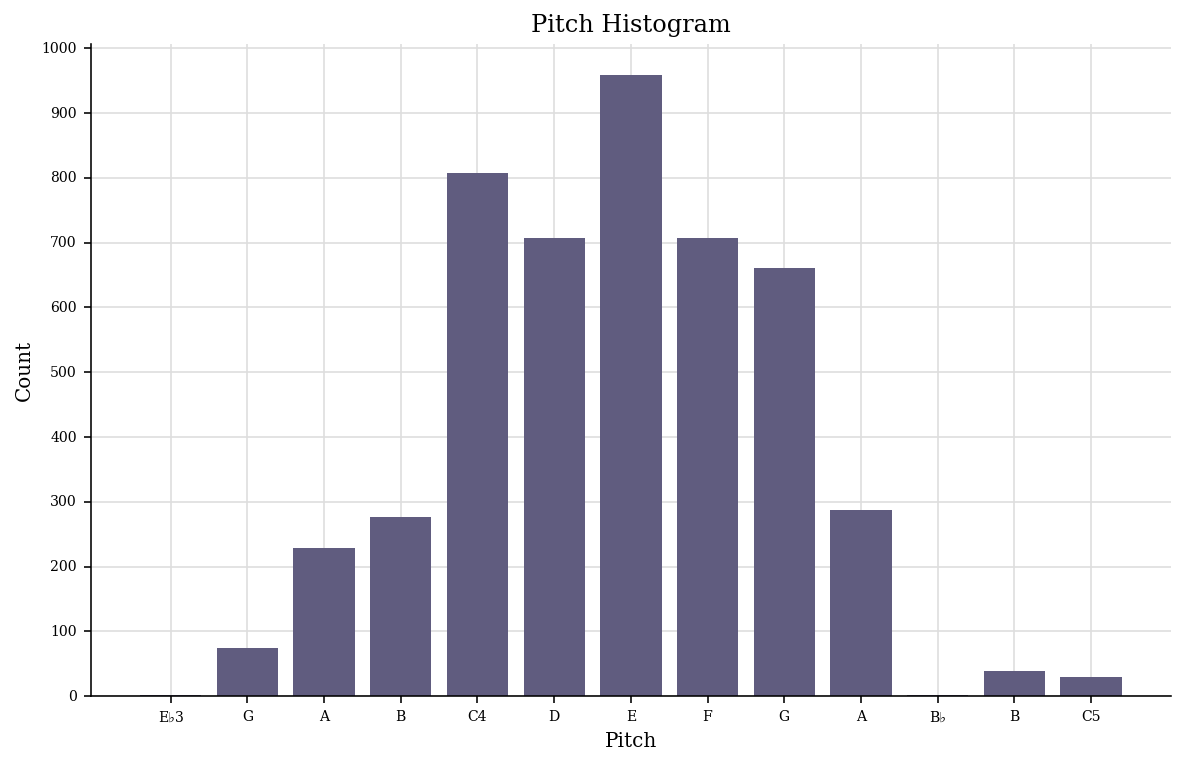

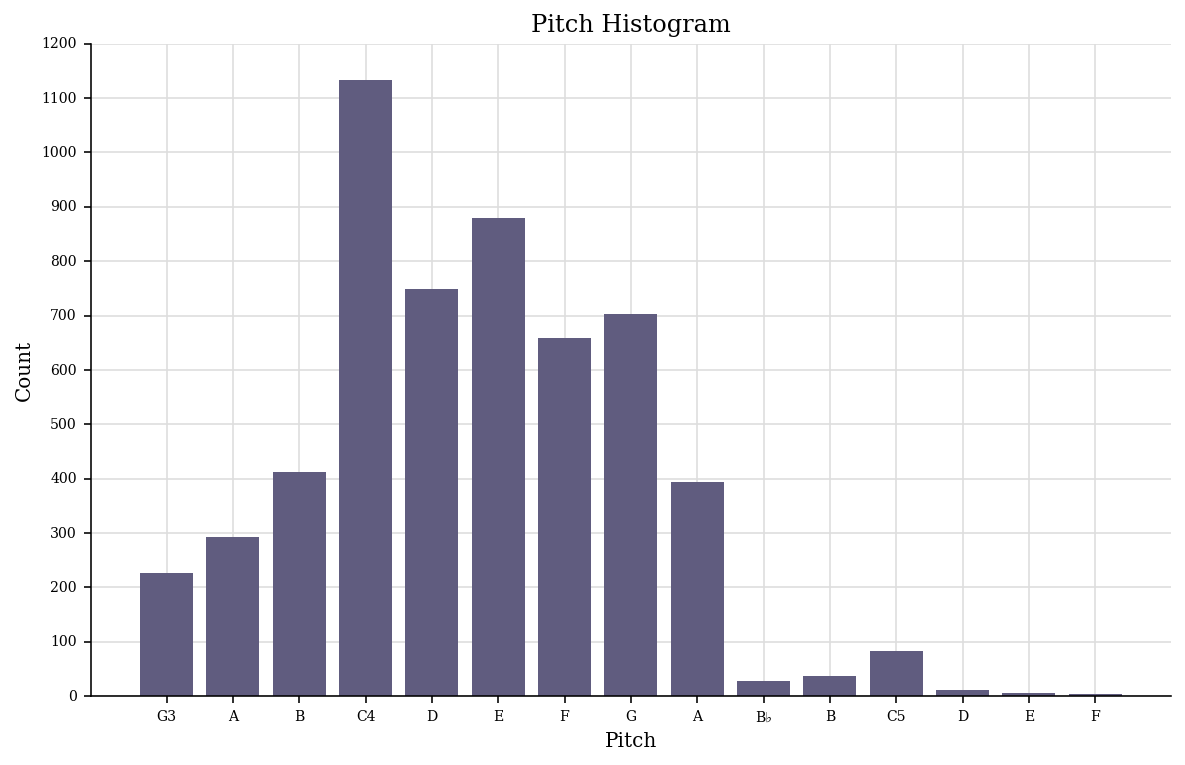

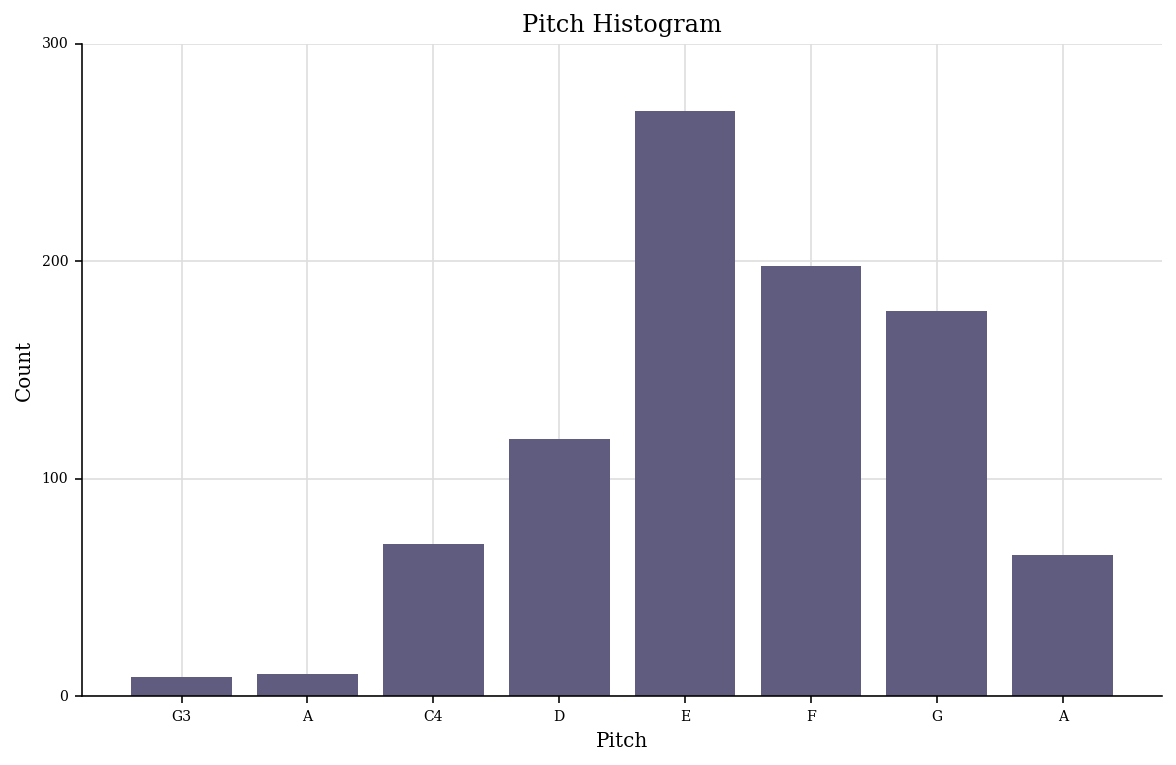

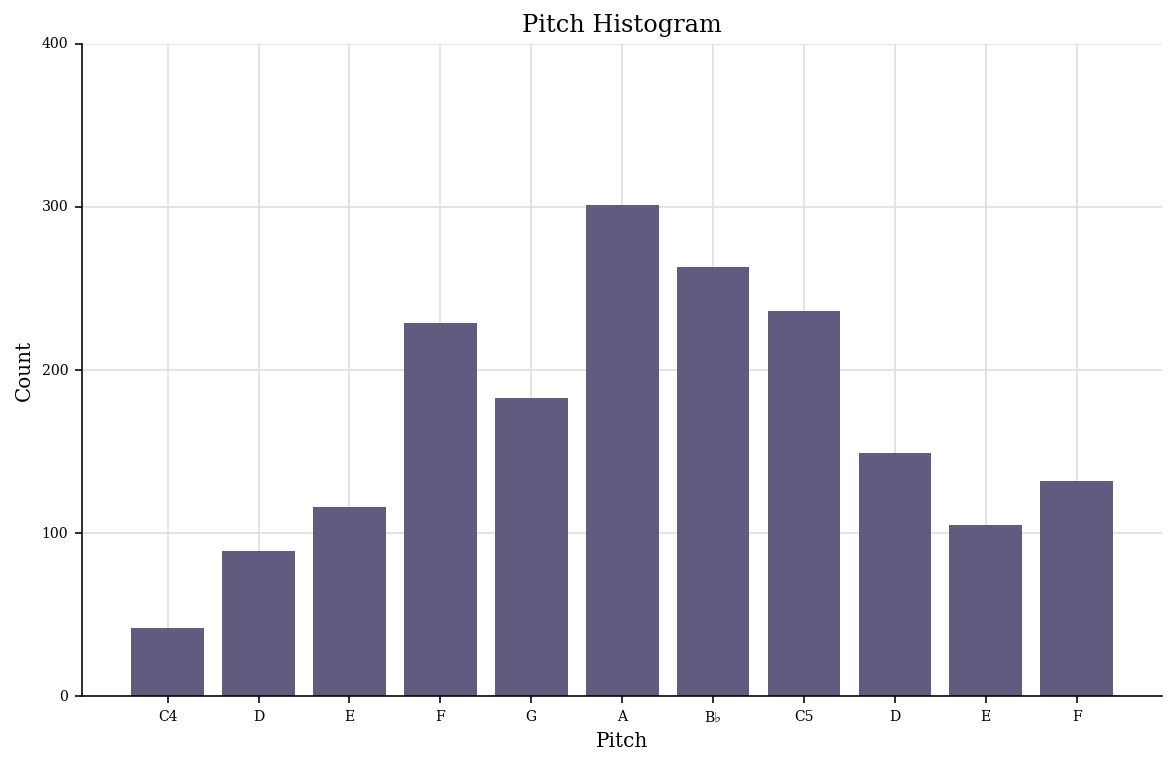

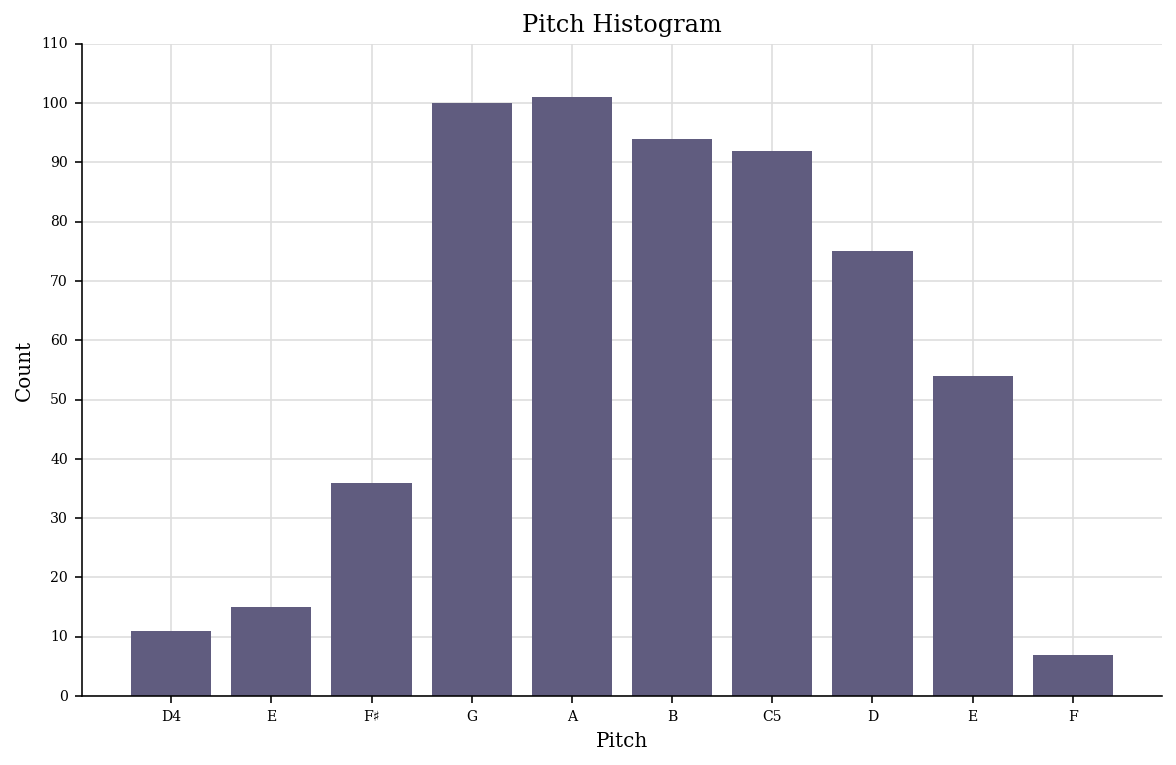

In [14]:
for mbid in mbids:
    filepath = 'scores/'+mbid+'.xml'
    s = converter.parse(filepath)
    s.plot('histogram', 'pitch')

In the next cell, all the notes present in the corpus are found and their appearence counted, to see how many of them are altered.

G3 1343
A 12244
B 6713
C4 17881
D 15299
E 23154
F 17095
G 17832
B♭ 590
C5 1475
F♯ 71
F♯3 18
E♭3 3
E3 6
D4 11


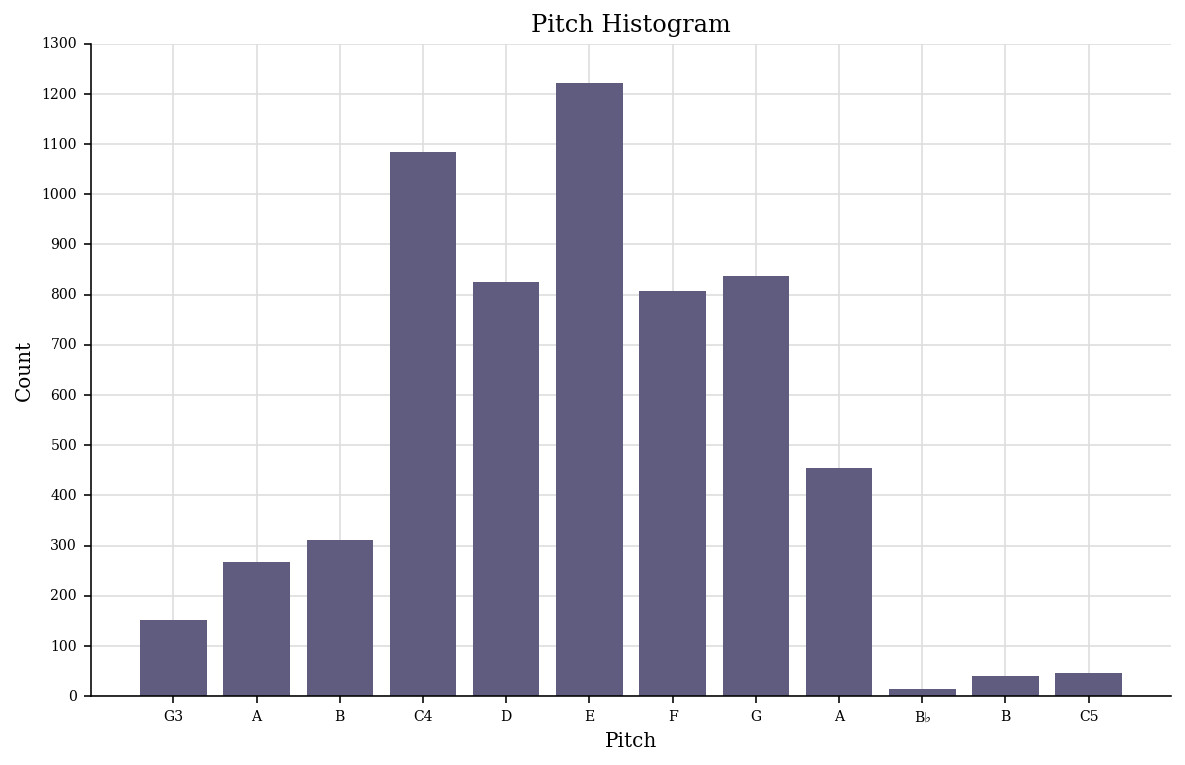

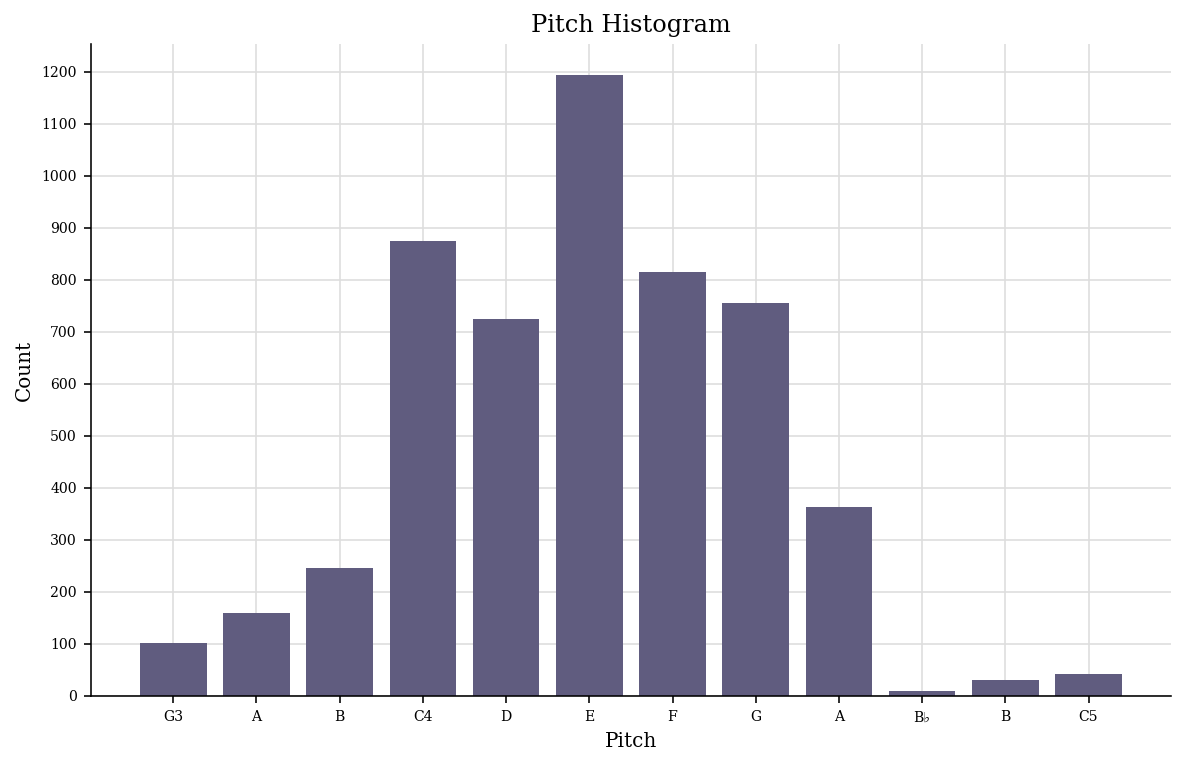

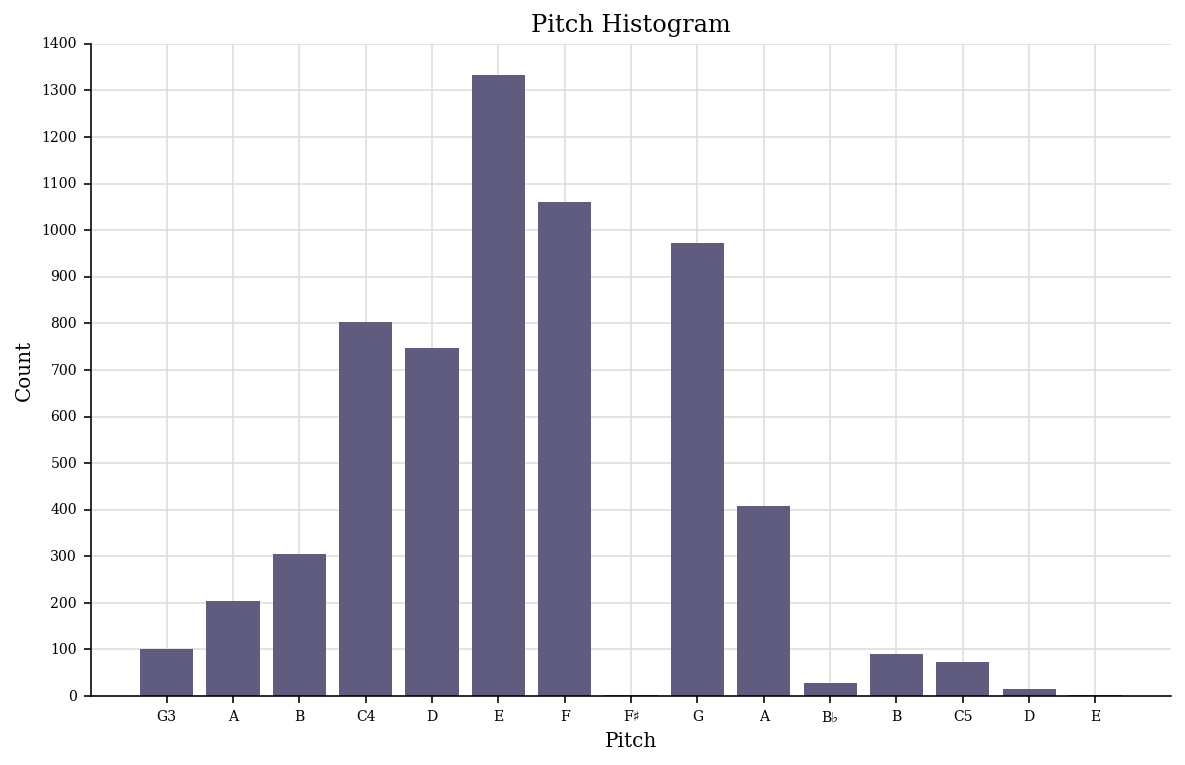

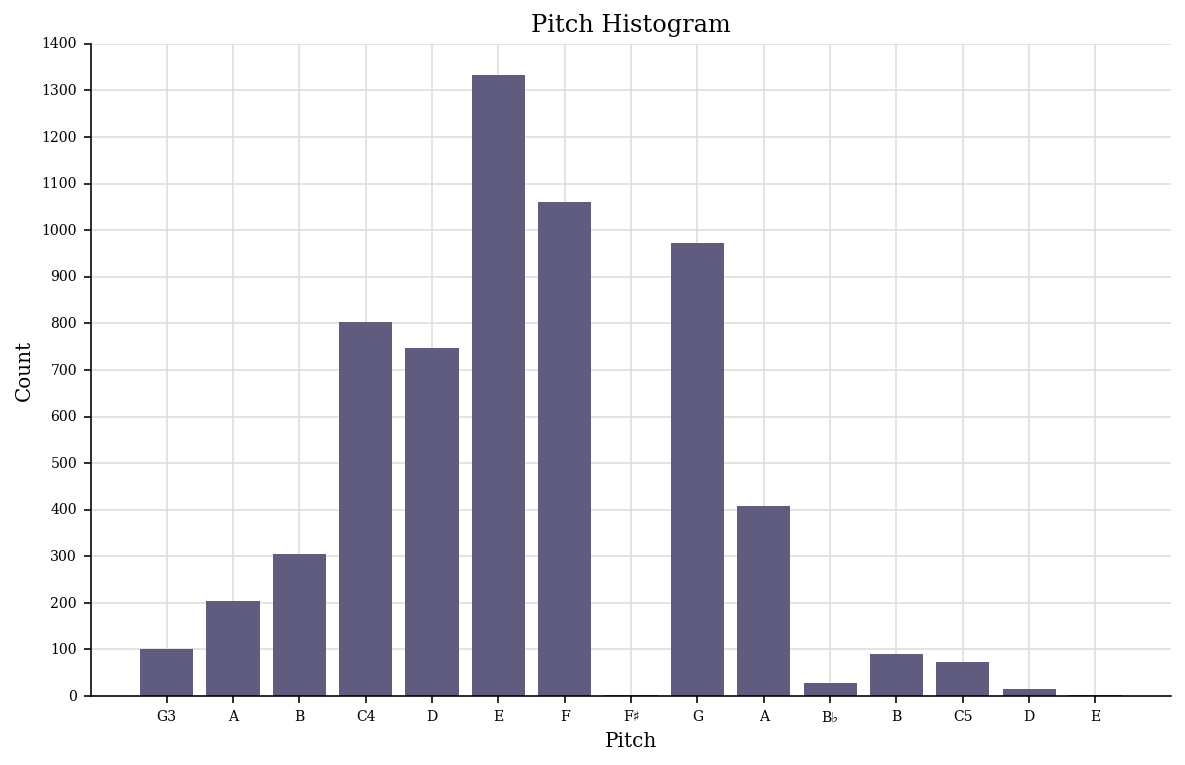

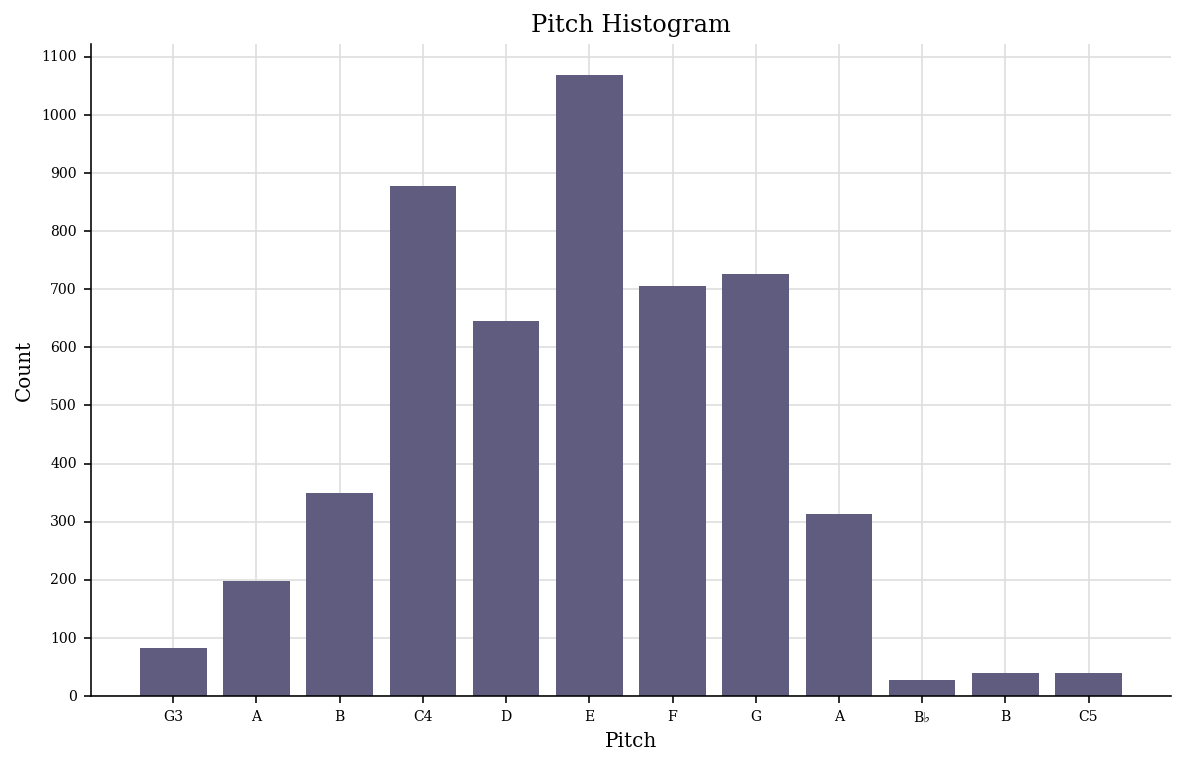

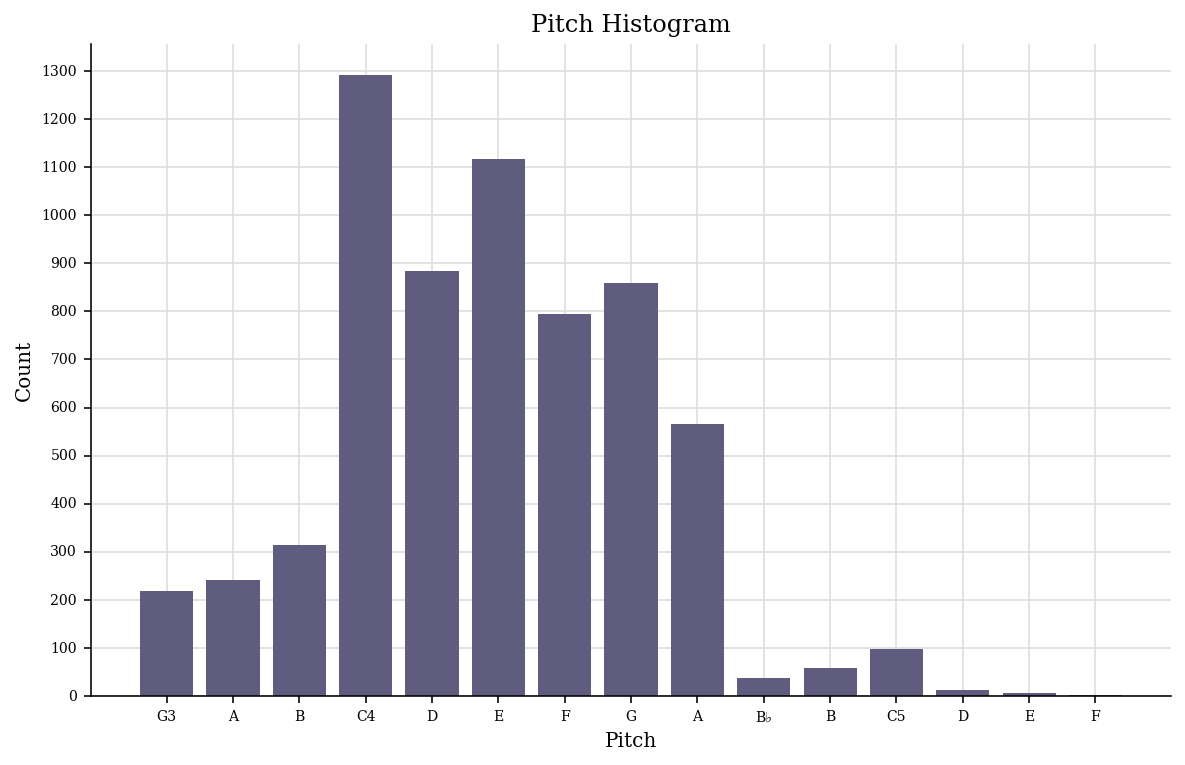

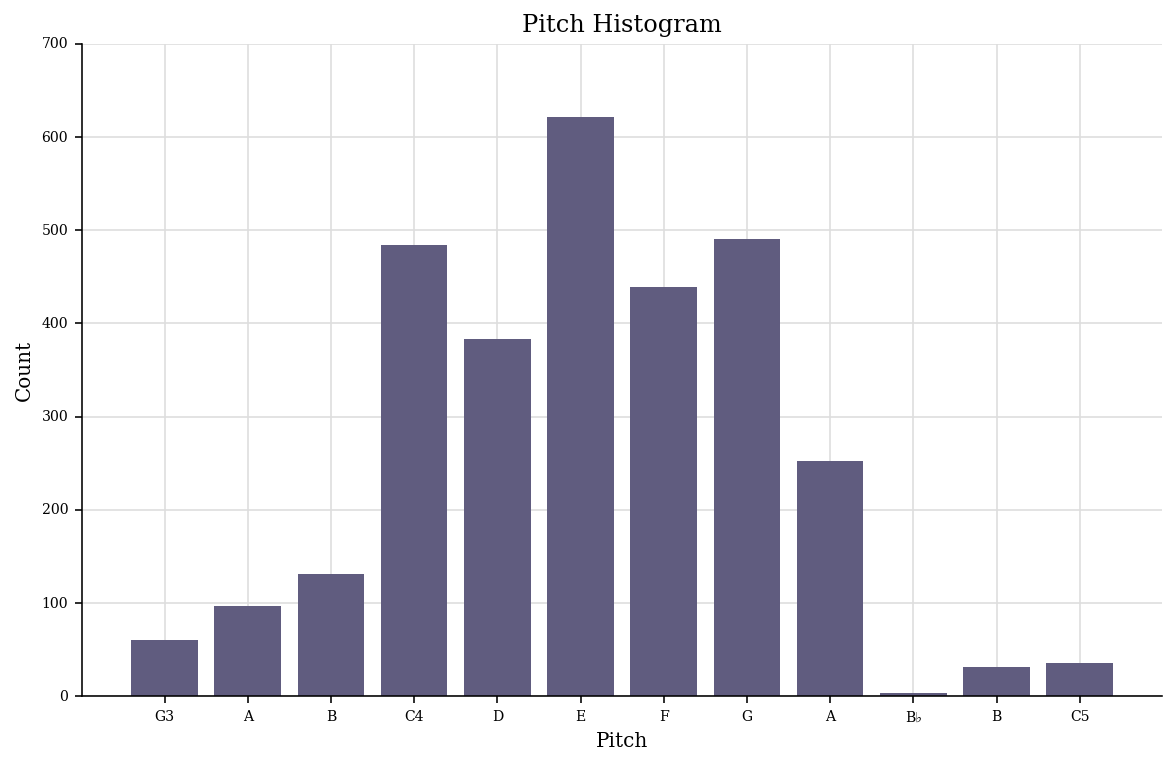

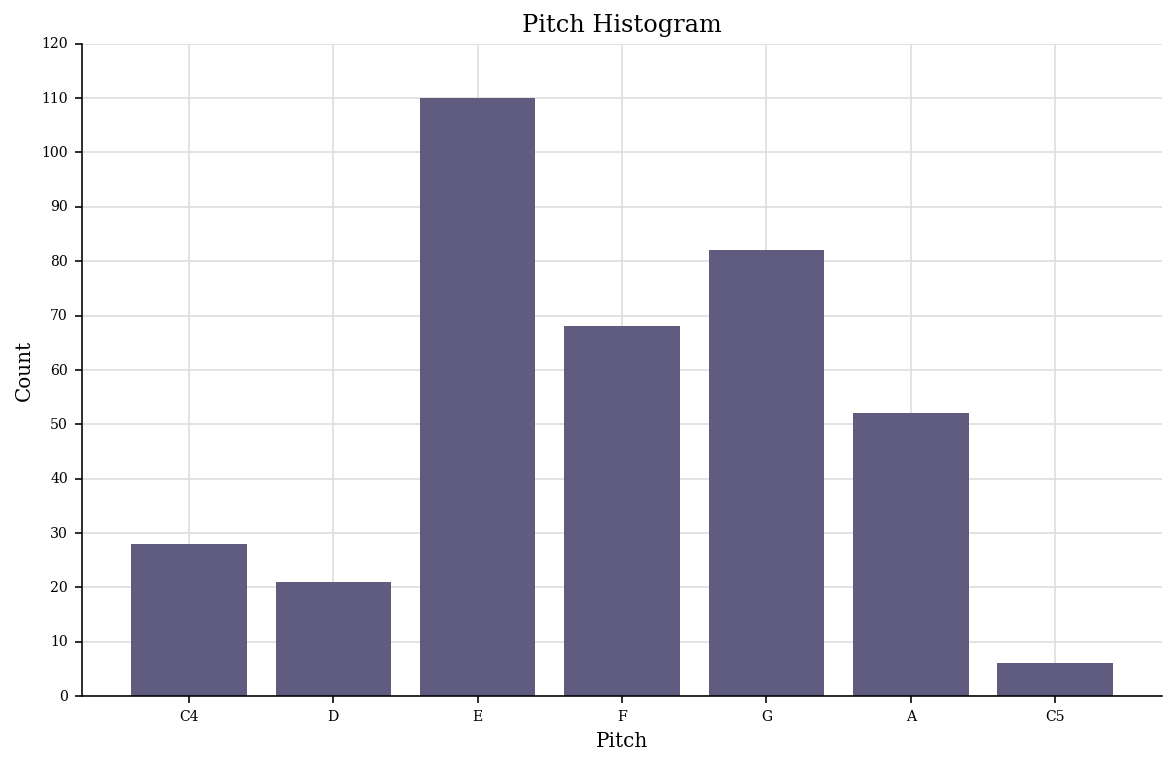

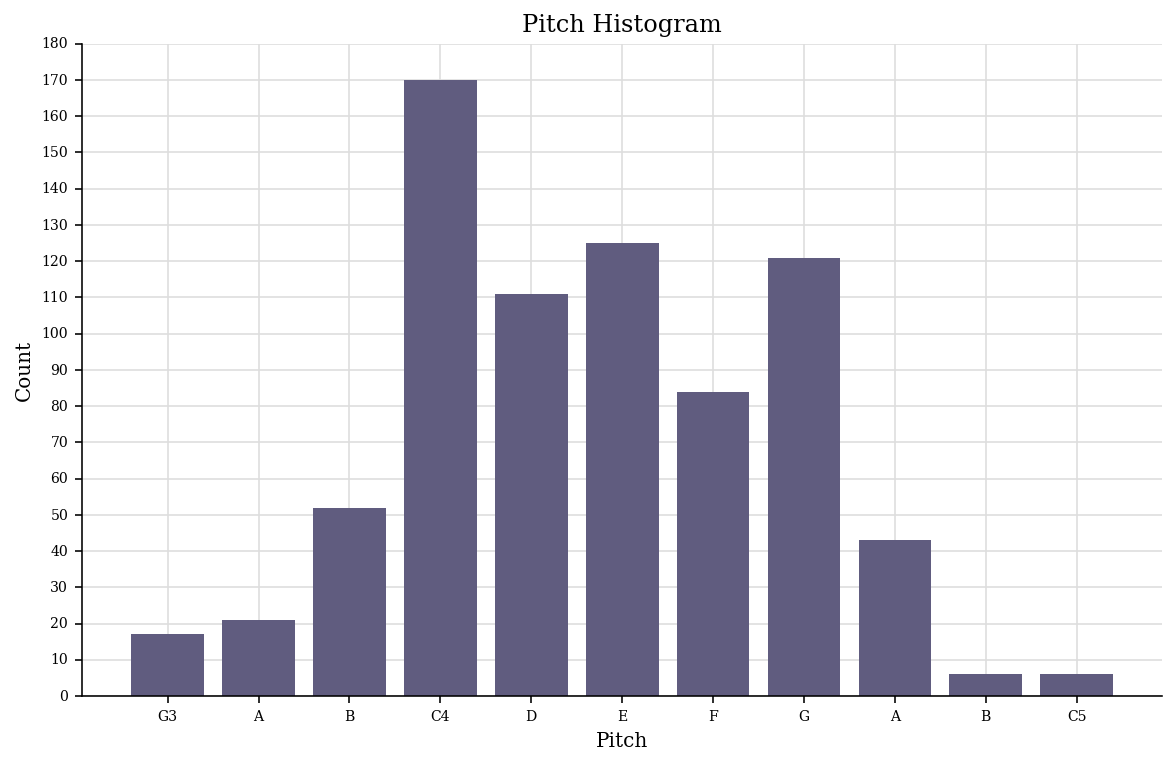

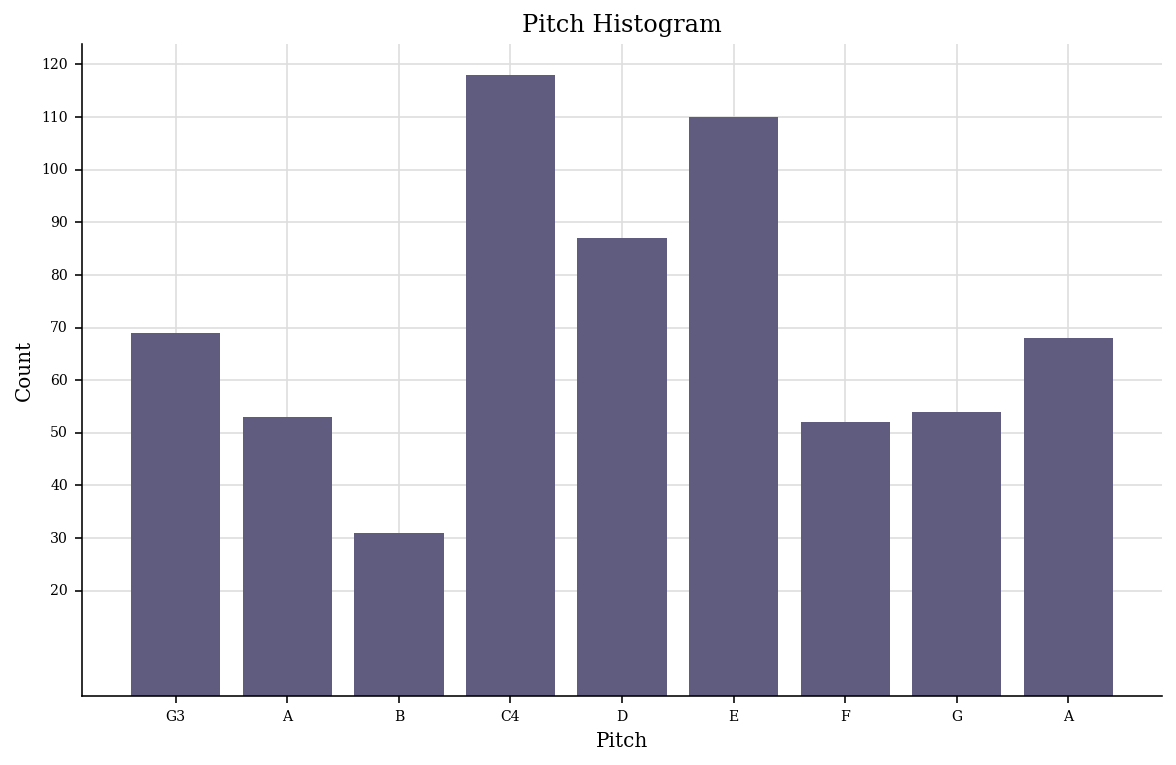

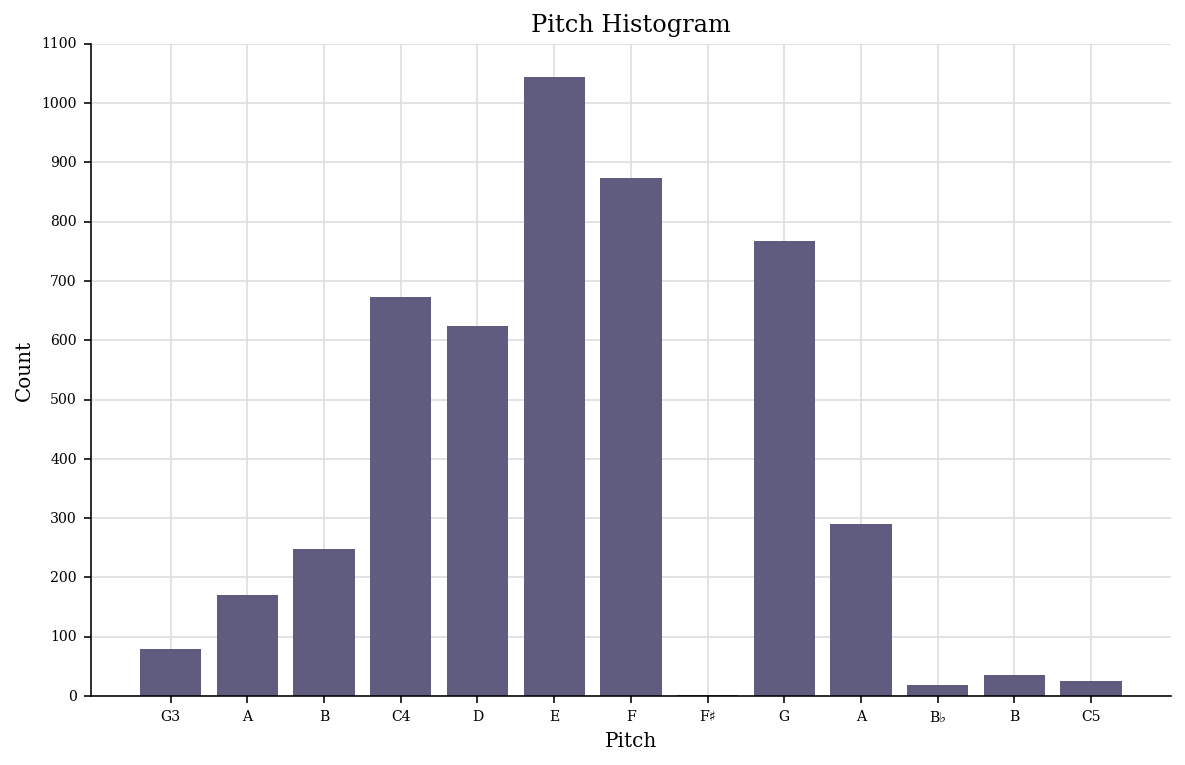

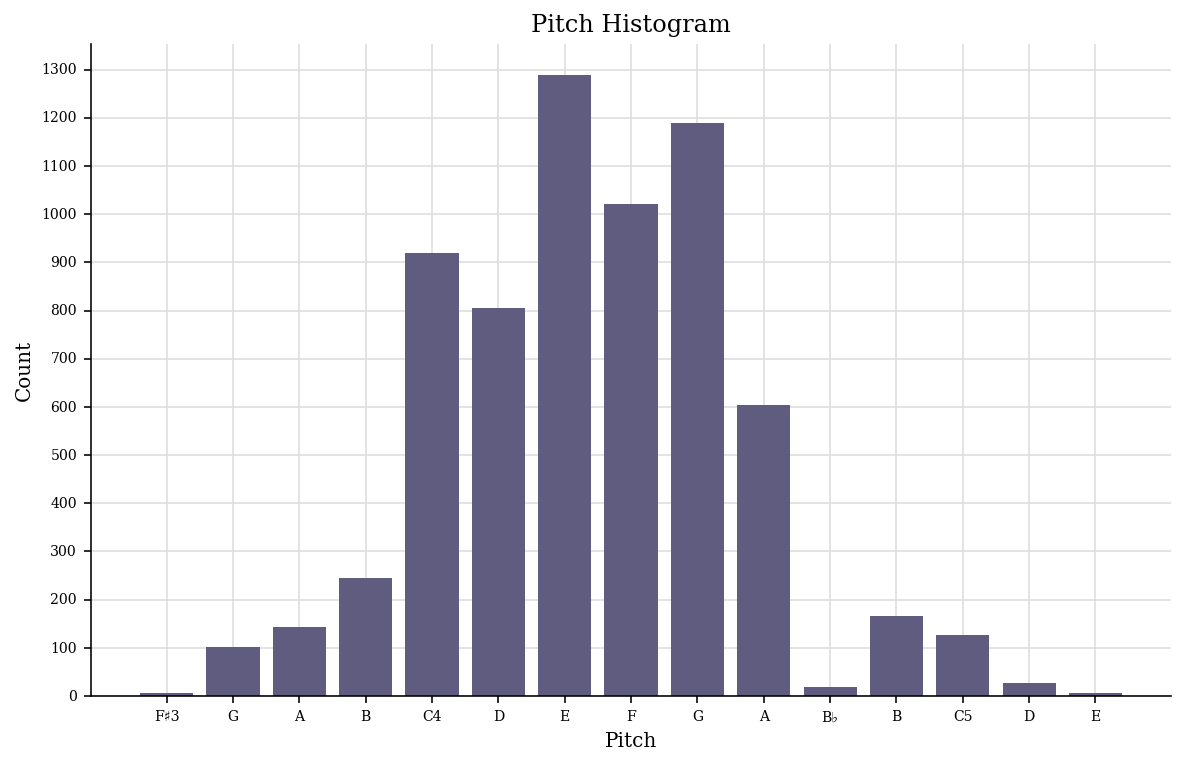

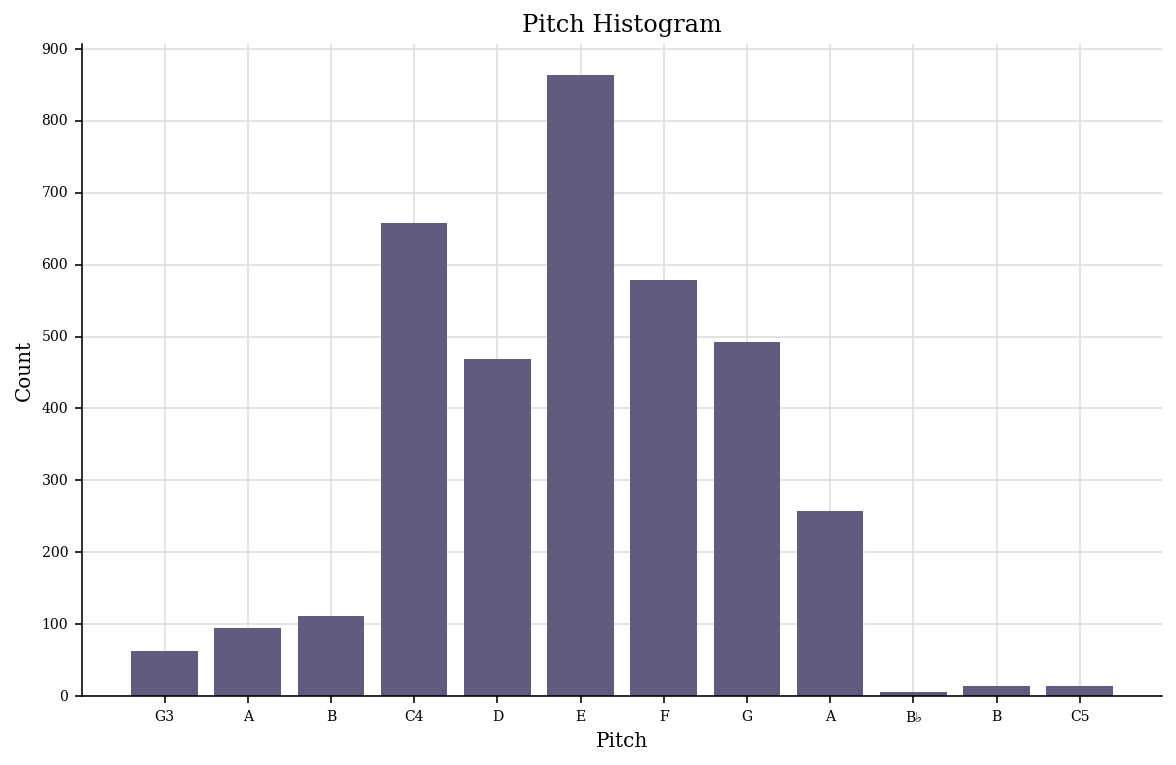

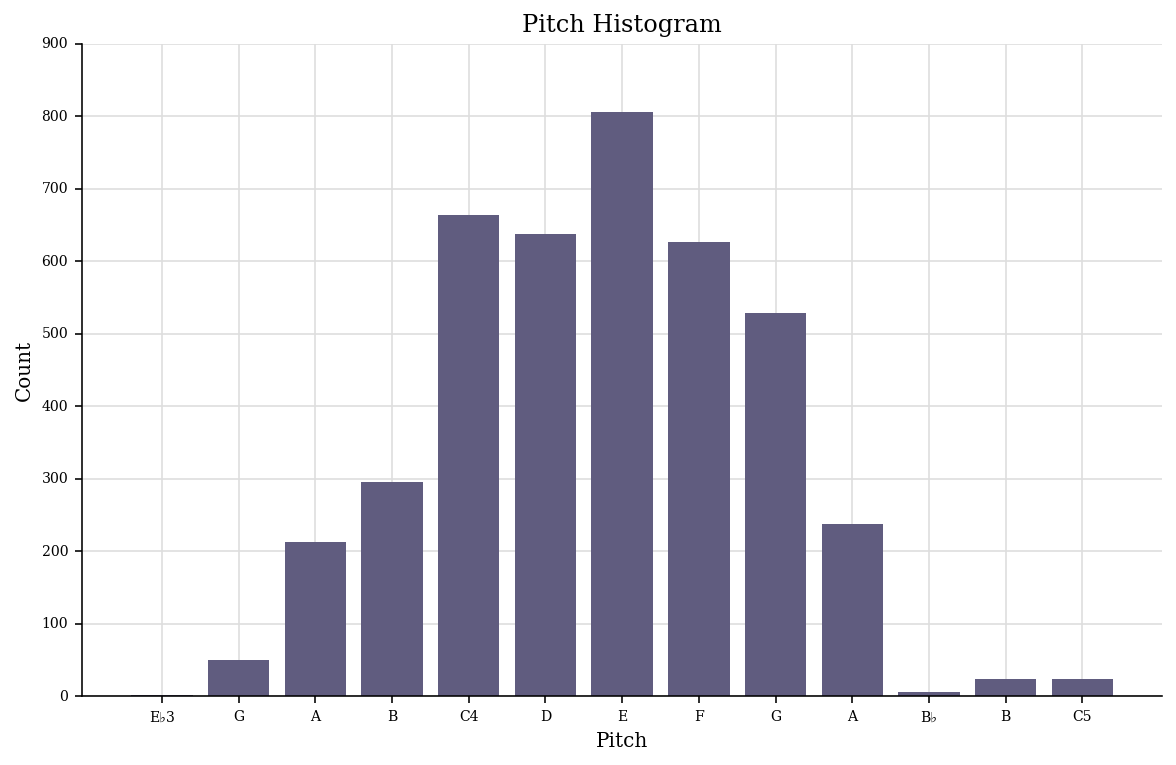

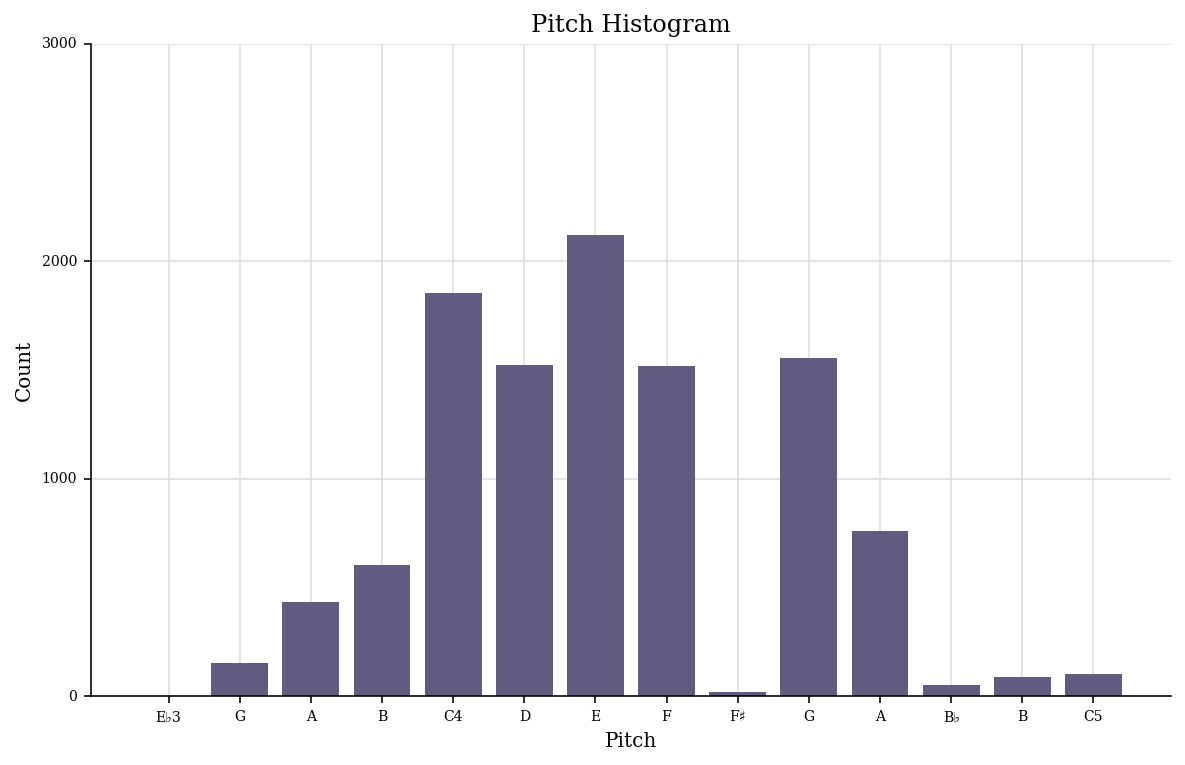

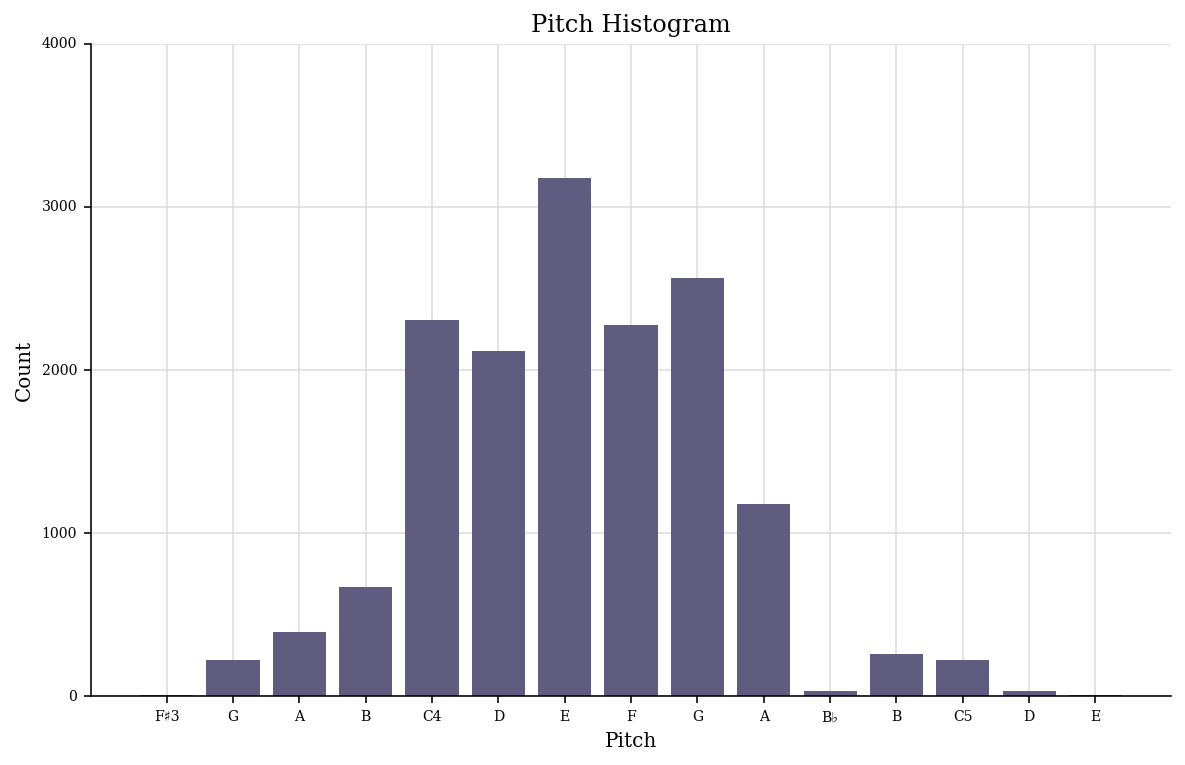

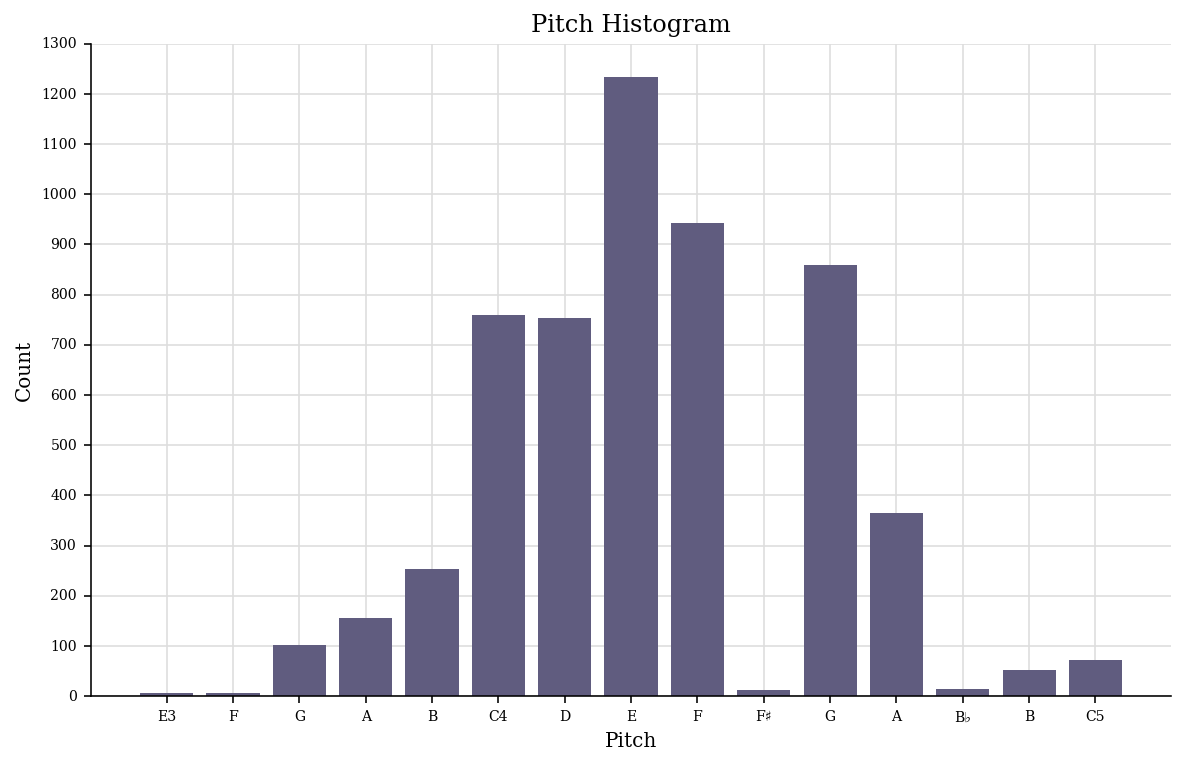

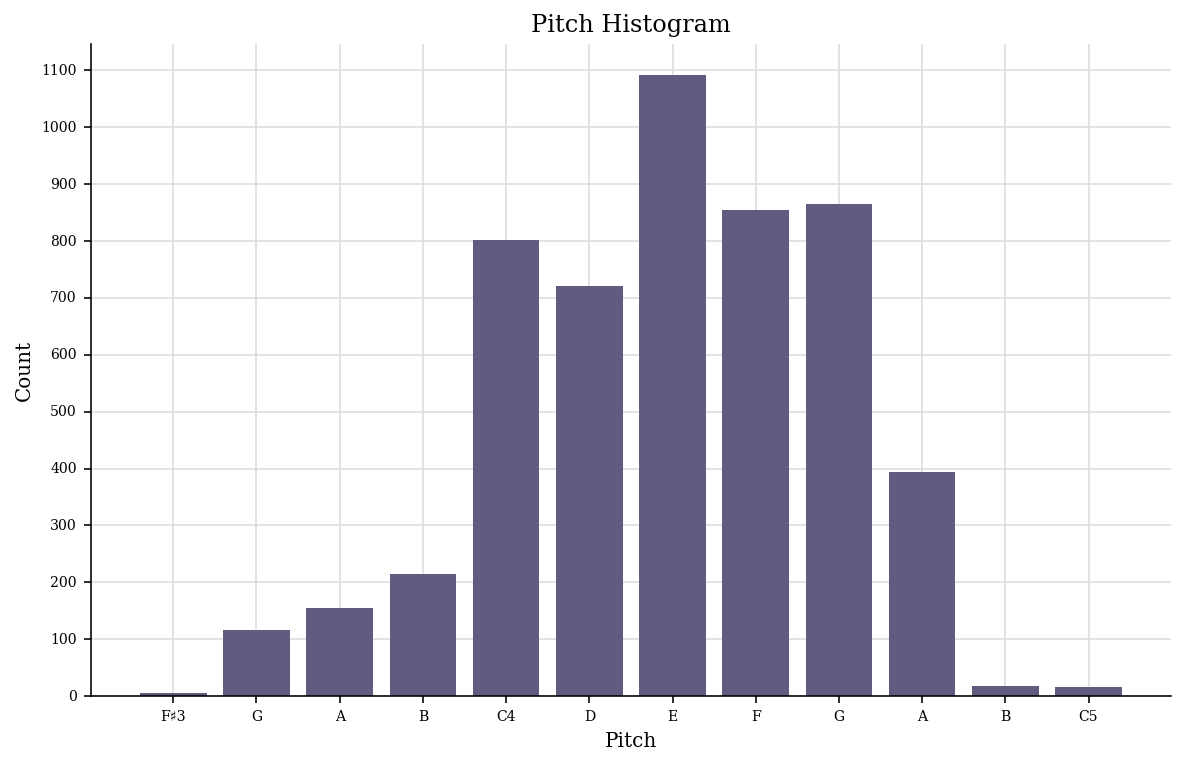

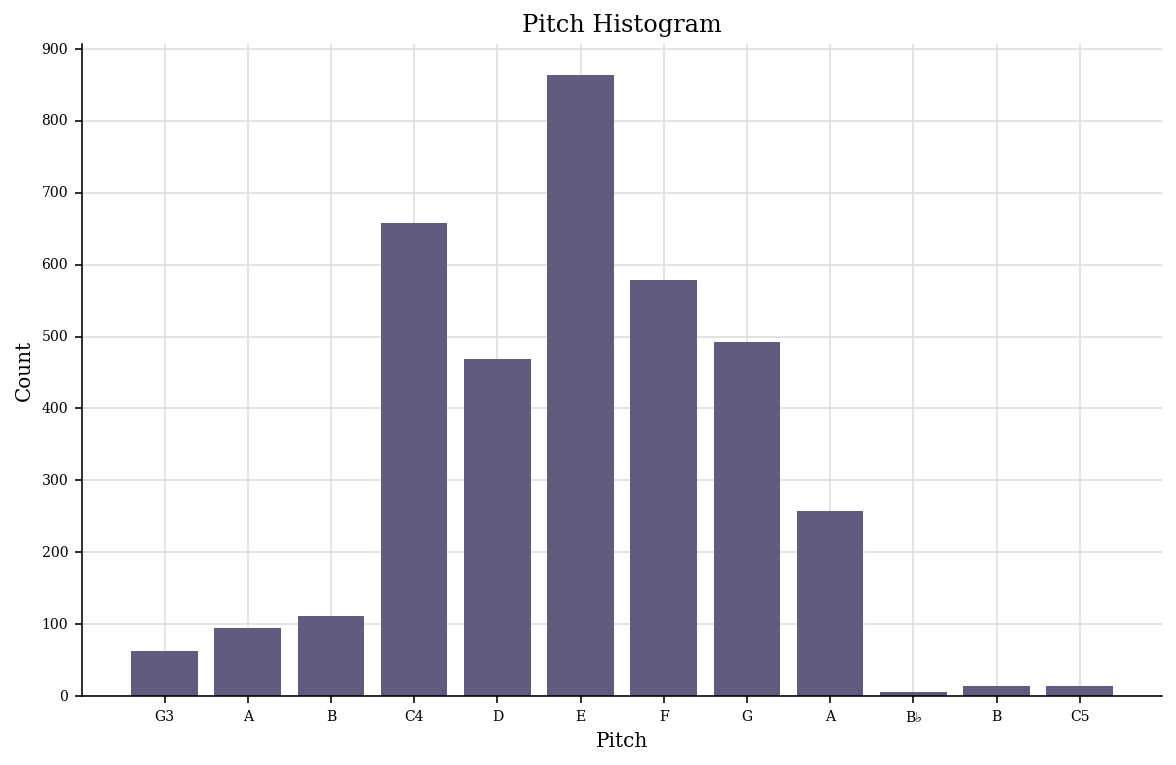

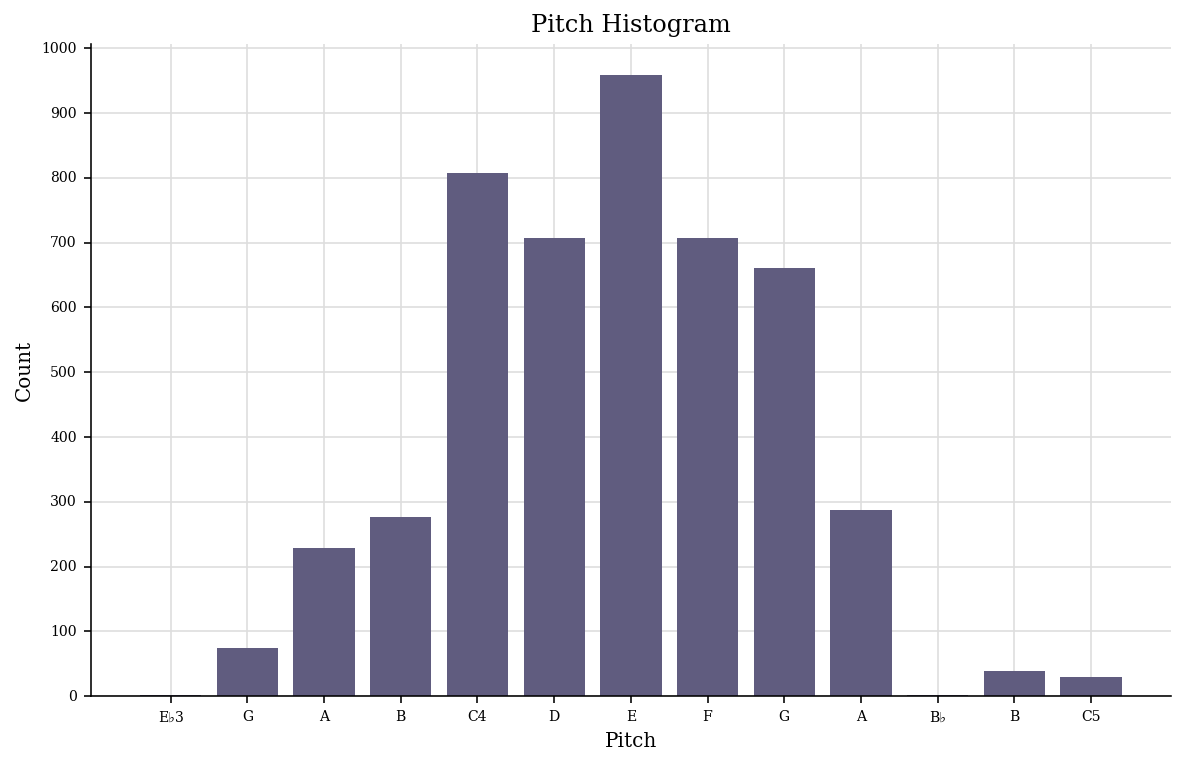

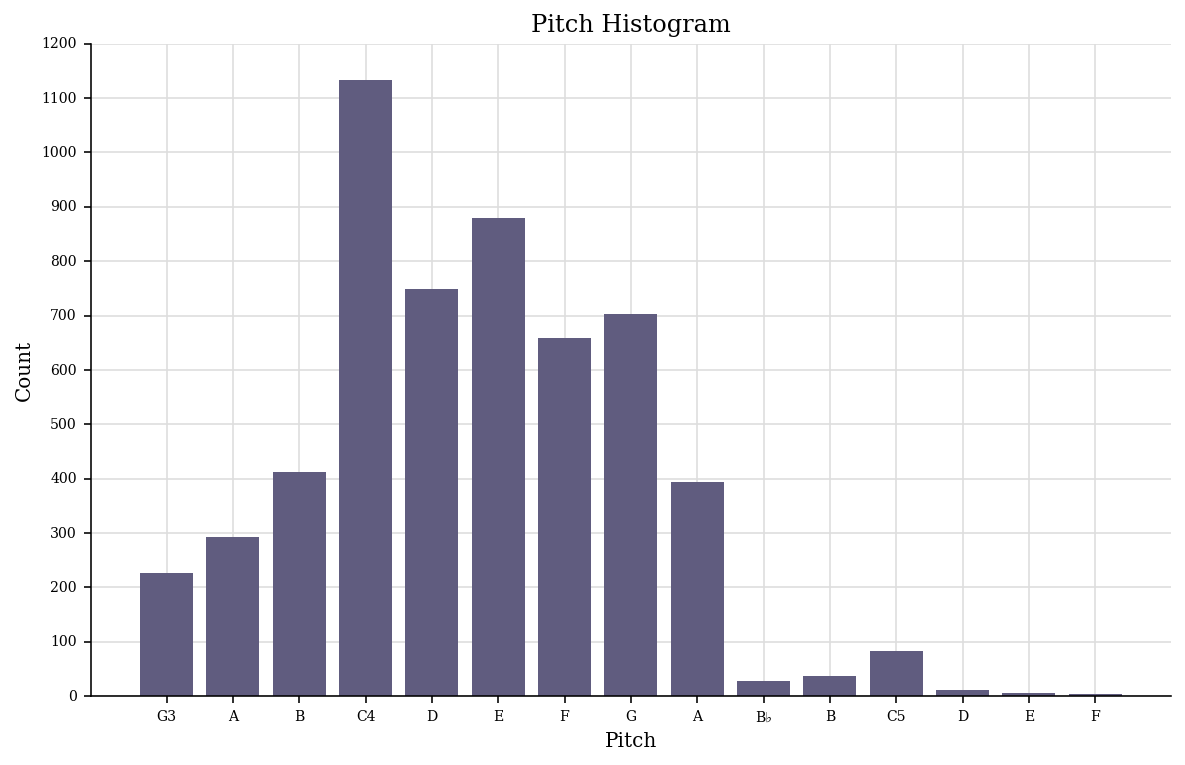

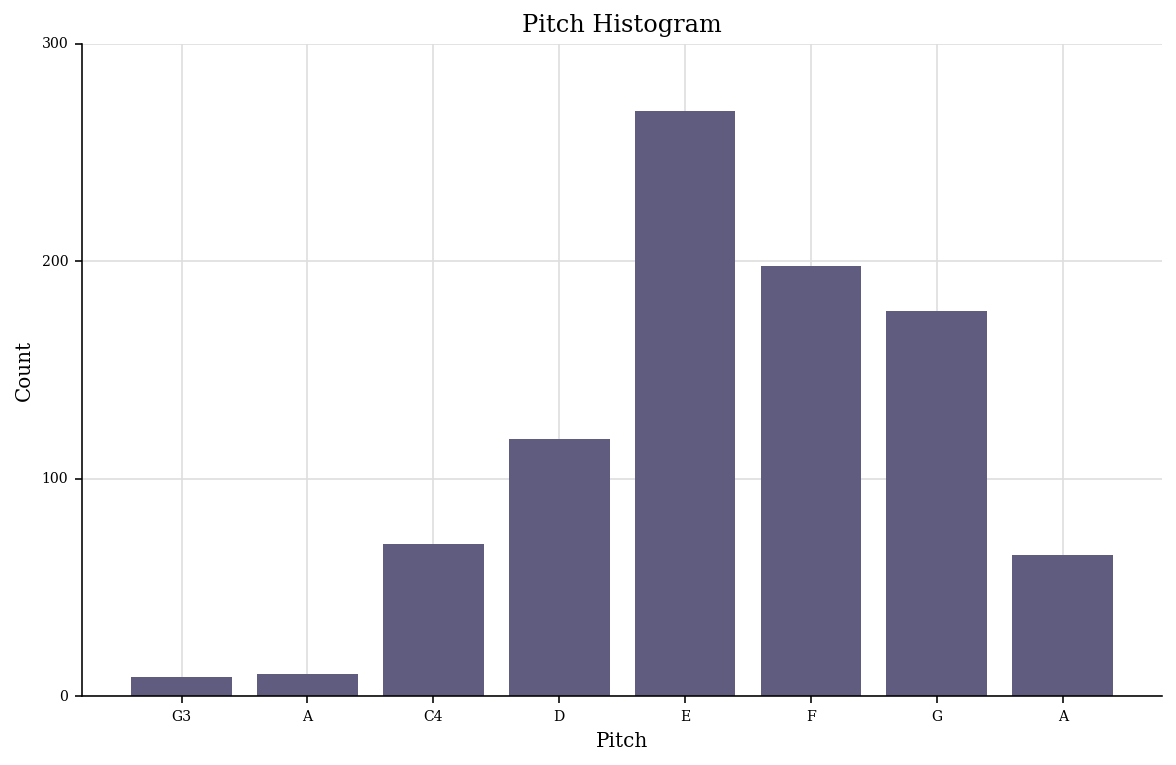

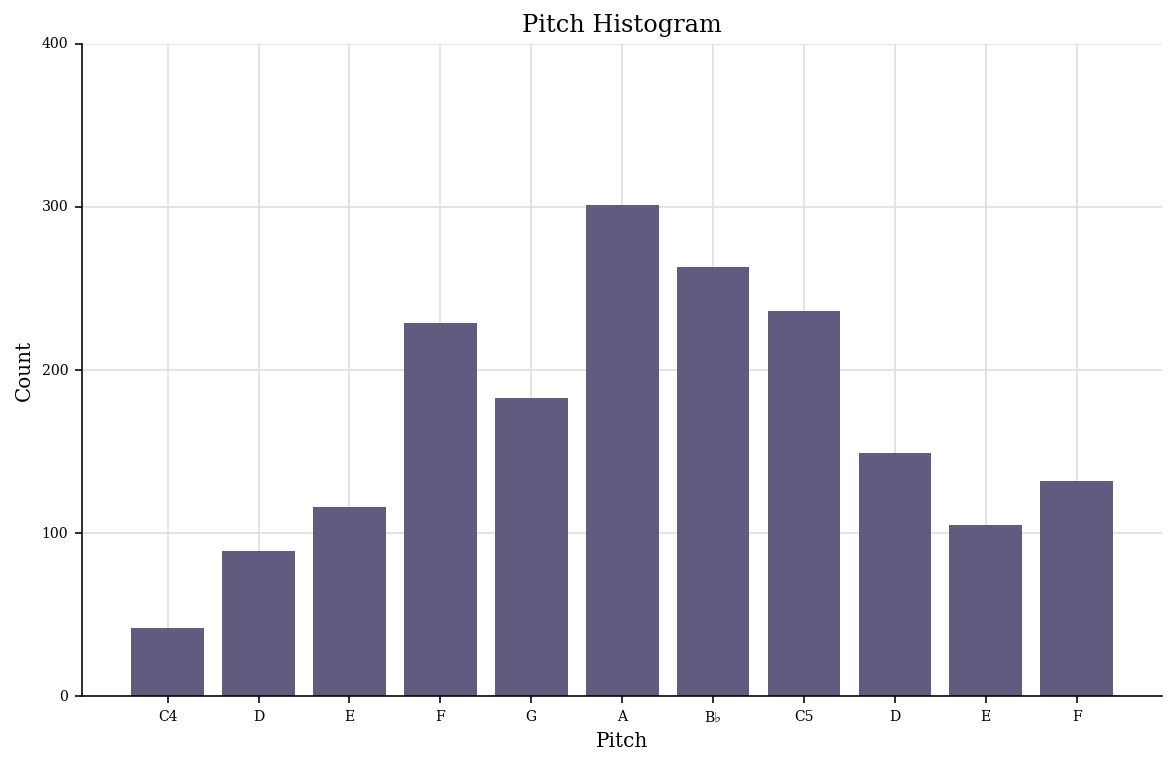

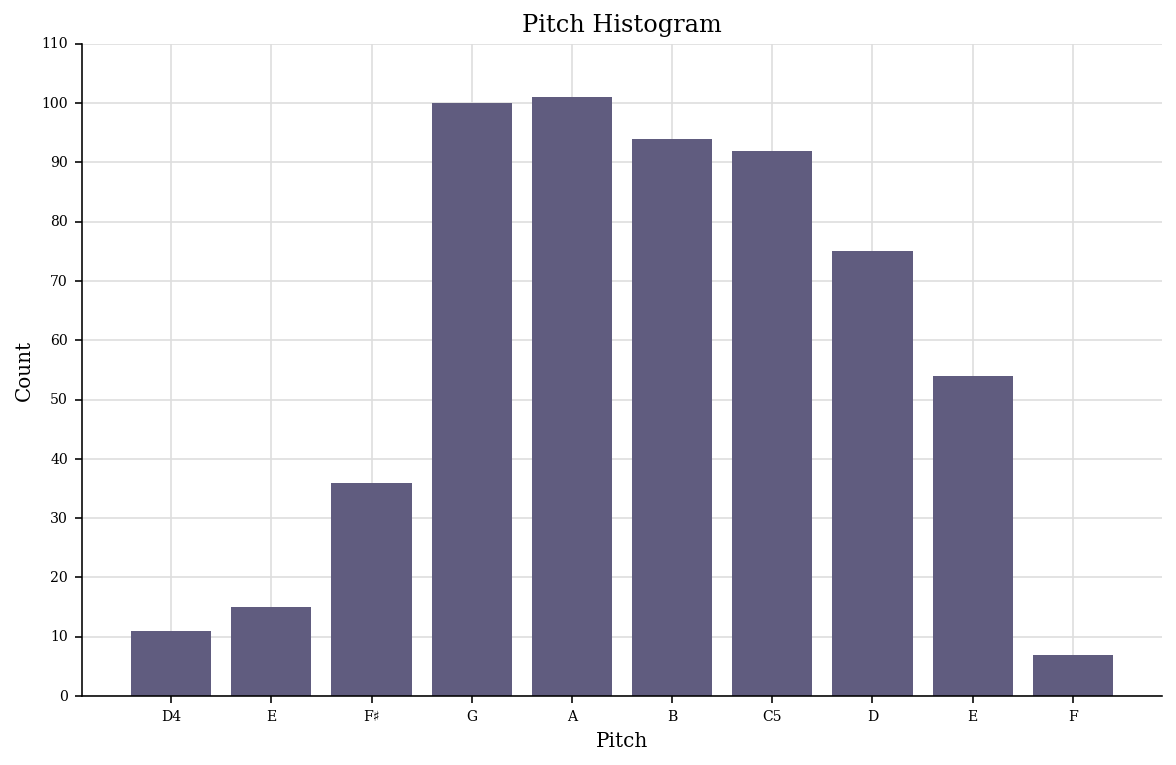

In [15]:
notesCount = {}
    
for mbid in mbids:
    s = converter.parse('scores/'+mbid+'.xml')
    p = graph.plot.HistogramPitchSpace(s)
    p.run()
    
    k = 0
    for key in p.axis['x']['ticks'][1]:
        if key not in notesCount:
            notesCount[key] = p.data[k][1]
        else:
            notesCount[key] += p.data[k][1]
        k += 1 
    
for key in notesCount.keys():
    print(key, notesCount[key])

## G persistent

The relation between the appearance of a note and its length is studied.


Total


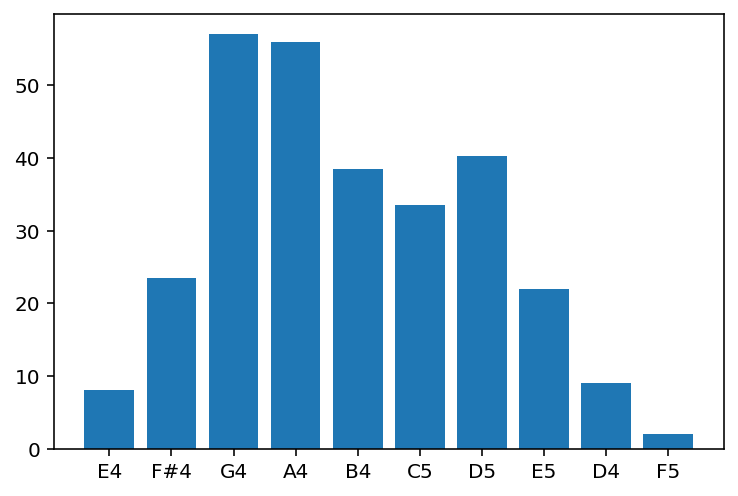

E4 8.0
F#4 23.5
G4 57.0
A4 56.0
B4 38.5
C5 33.5
D5 40.25
E5 22.0
D4 9.0
F5 2.0


In [16]:
globalPitchHistogram = {}

for mbid in mbids:
    s = converter.parse('scores/'+mbid+'.xml')
    
    nn = s.flat.notes.stream()
    pitchHistogram = {}
    globalPitchHistogram = {}

    for n in nn:
        pitchHistogram[n.nameWithOctave] = pitchHistogram.get(n.nameWithOctave, 0) + n.quarterLength
        globalPitchHistogram[n.nameWithOctave] = pitchHistogram.get(n.nameWithOctave, 0) + n.quarterLength

#     xValues = pitchHistogram.keys()
#     yValues = pitchHistogram.values()

#     plt.bar(xValues, yValues)
#     plt.show()
    
print('\nTotal')

xValues = globalPitchHistogram.keys()
yValues = globalPitchHistogram.values()

plt.bar(xValues, yValues)
plt.show()

for key in globalPitchHistogram.keys():
    print(key, globalPitchHistogram[key])